<!DOCTYPE html>
<html>
  <body>
    <div align=center>
      <h1><b>Organización de Datos</b></h1>
      <p>Cátedra Rodriguez - 95.58</p>
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/FIUBA_gris_transparente.png/800px-FIUBA_gris_transparente.png" alt="logo" width="300">
      <h2><b>Trabajo Práctico N°1: Reservas de Hotel</b></h2>
    </div>
    <h3>Integrantes del <b>Grupo 17 (Systeam)</b></h3>
    <ul>
        <li>Agha Zadeh Dehdeh, Lucía. P: 106905</li>
        <li>Brizuela, Sebastián. P: 105288</li>
        <li>Del Rio, Juan Sebastián. P: 103337</li>
    </ul>
  </body>
</html>

# Librerías

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


#**Análisis exploratorio**

## Dataframe Principal

In [4]:
DF_HOTEL = pd.read_csv("./sample_data/hotels_train.csv") # Cargamos en memoria el dataset
df_hotel_copy = DF_HOTEL.copy()

## Información del dataframe

### Cantidad de filas y columnas

In [5]:
print(f"Filas: {DF_HOTEL.shape[0]}")
print(f"Columnas: {DF_HOTEL.shape[1]}")

Filas: 61913
Columnas: 31


### Tipos de datos del dataframe y cantidad de valores no nulos

In [6]:
DF_HOTEL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

### Visualizamos las primeras 5 filas del dataframe

In [7]:
DF_HOTEL.head()

hotel  lead_time  arrival_date_year arrival_date_month  \
0    City Hotel         49               2016          September   
1  Resort Hotel          4               2015            October   
2    City Hotel         25               2016            October   
3    City Hotel         26               2016           December   
4    City Hotel        104               2017              March   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        37                          5   
1                        44                         31   
2                        42                         13   
3                        51                         12   
4                        12                         19   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        1                     2       1       0.0  ...   
1                        0                     1       2       0.0  ...   
2                        0                     1       2       2.0  ...   
3                        2                     5       2       0.0  ...   
4                        2                     5       2       0.0  ...   

   deposit_type  agent company days_in_waiting_list    customer_type    adr  \
0    No Deposit    9.0     NaN                    0        Transient  115.5   
1    No Deposit    NaN     NaN                    0        Transient   42.0   
2    No Deposit    9.0     NaN                    0        Transient  229.0   
3    Non Refund  154.0     NaN                    0        Transient   75.0   
4    No Deposit   20.0     NaN                    0  Transient-Party   75.0   

   required_car_parking_spaces  total_of_special_requests  \
0                            0                          1   
1                            1                          0   
2                            0                          2   
3                            0                          0   
4                            0                          1   

                                     id is_canceled  
0  7aa4cc6b-b92c-4061-b21d-4f9e0cac4689           1  
1  b1428f80-c56c-4ae4-91a9-6962edae08b1           0  
2  2226c018-ea20-4c4e-8f71-ea66aee70d7c           0  
3  314f56dc-2e4d-4298-9bdd-27bb008bffff           1  
4  28c75445-c603-413a-babf-ad377018b592           0  

[5 rows x 31 columns]

### Observaciones

In [8]:
DF_HOTEL[DF_HOTEL.duplicated()]

Empty DataFrame
Columns: [hotel, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, id, is_canceled]
Index: []

[0 rows x 31 columns]

El DataFrame no posee registros duplicados.

# A) Exploración inicial

### Variables Cuantitativas

Calculamos la cantidad, la media, mediana, el mínimo y máximo de las variables.

* **lead_time**: Cantidad de días desde la fecha de reserva y la fecha de llegada (*Discreta*).
* **arrival_date_year**: Año de llegada (*Discreta*).
* **arrival_date_week_number**: Número de la semana de llegada (*Discreta*).
* **arrival_date_day_of_month**: Día del mes de la fecha de llegada (*Discreta*).
* **stays_in_weekend_nights**: Cantidad de noches de fin de semana reservadas (*Discreta*).
* **stays_in_week_nights**: Cantidad de noches entre semana reservadas (*Discreta*).
* **adults**: Cantidad de adultos (*Discreta*).
* **children**: Cantidad de niños (*Discreta*).
* **babies**: Cantidada de bebés (*Discreta*).
* **previous_cancellations**: Cantidad de reservas canceladas anteriormente (*Discreta*).
* **previous_bookings_not_canceled**: Cantidad de reservas anteriores no canceladas del cliente antes de la reserva actual (*Discreta*).
* **booking_changes**: Cantidad de cambios en la reserva (*Discreta*).
* **days_in_waiting_list**: Cantidad de dias de la reserva en lista de espera antes de la confirmación (*Discreta*).
* **adr**: Tarifa diaria promedio (*Discreta*).
* **required_car_parking_spaces**: Cantidad de plazas de aparcamiento necesarias (*Discreta*).
* **total_of_special_requests**: Cantidad de solicitudes especiales del cliente (*Discreta*).

In [9]:
variables_numericas = DF_HOTEL.select_dtypes(include=["int64", "float64"])
variables_cuantitativas = variables_numericas.drop(["is_repeated_guest", "agent", "company", "is_canceled"], axis=1)
variables_cuantitativas.describe()

lead_time  arrival_date_year  arrival_date_week_number  \
count  61913.000000       61913.000000               61913.00000   
mean     112.248187        2016.154749                  27.21808   
std      110.717953           0.708389                  13.52601   
min        0.000000        2015.000000                   1.00000   
25%       23.000000        2016.000000                  16.00000   
50%       78.000000        2016.000000                  28.00000   
75%      172.000000        2017.000000                  38.00000   
max      629.000000        2017.000000                  53.00000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count               61913.000000             61913.000000   
mean                   15.785812                 0.924135   
std                     8.795489                 0.993101   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                16.000000   

       stays_in_week_nights        adults      children        babies  \
count          61913.000000  61913.000000  61909.000000  61913.000000   
mean               2.510054      1.862791      0.104896      0.007155   
std                1.884926      0.589066      0.402847      0.092158   
min                0.000000      0.000000      0.000000      0.000000   
25%                1.000000      2.000000      0.000000      0.000000   
50%                2.000000      2.000000      0.000000      0.000000   
75%                3.000000      2.000000      0.000000      0.000000   
max               40.000000     55.000000     10.000000      9.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count            61913.000000                    61913.000000   
mean                 0.114790                        0.115420   
std                  0.993723                        1.396359   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       70.000000   

       booking_changes  days_in_waiting_list           adr  \
count     61913.000000          61913.000000  61913.000000   
mean          0.195952              2.638977    102.383773   
std           0.610519             18.619092     47.757640   
min           0.000000              0.000000     -6.380000   
25%           0.000000              0.000000     70.000000   
50%           0.000000              0.000000     95.000000   
75%           0.000000              0.000000    126.000000   
max          17.000000            391.000000    510.000000   

       required_car_parking_spaces  total_of_special_requests  
count                 61913.000000               61913.000000  
mean                      0.049957                   0.523703  
std                       0.221023                   0.775412  
min                       0.000000                   0.000000  
25%                       0.000000                   0.000000  
50%                       0.000000                   0.000000  
75%                       0.000000                   1.000000  
max                       8.000000                   5.000000

### Variables Cualitativas

Reporte de los posibles valores que toman y la cantidad de veces que aparecen.

* **hotel:** Nombre del hotel de la reserva (*Nominal*)
* **arrival_date_month:** Mes de la fecha de llegada (*Nominal*)
* **meal:** Tipo de comida reservada (*Nominal*)
* **country:** País de origen (*Nominal*)
* **market_segment:** Origen de la reserva (Web / Agencia de viajes) (*Nominal*)
* **is_repeated_guest:** La reserva fue de un cliente repetido(1) o no(0) (*Numérica nominal*)
* **distribution_channel:** Canal de distribución de reservas (*Nominal*)
* **reserved_room_type:** Código de tipo de habitación reservada (*Nominal*)
* **assigned_room_type:** Código de tipo de habitacón asignada (*Nominal*)
* **deposit_type:** Indicación si el cliente realizó un depósito para garantizar la reserva (*Nominal*)
* **agent:** Id de la agencia de viajes (*Numérica nominal*)
* **company:** Id de la empresa que realizó la reserva o responsable del pago (*Numérica nominal*)
* **customer_type:** Tipo de reserva (Contract, Group, Transient, Transient-party) (*Nominal*)
* **id:** Número de identificación de la reserva (*Numérica nominal*)
* **is_canceled:** Si la reserva fue cancelada(1) o no(0) (*Numérica nominal*)

In [10]:
variables_tipo_object = DF_HOTEL.select_dtypes(include=["object"])
variables_numericas_nominales = DF_HOTEL[["is_repeated_guest", "agent", "company", "is_canceled"]]

variables_cualitativas = pd.concat([variables_tipo_object, variables_numericas_nominales], axis=1)


In [11]:
for variable_cualitativa in variables_cualitativas.columns:
    print("Valores unicos y frecuencia de los valores:")
    print(DF_HOTEL[variable_cualitativa].value_counts(), end='\n\n')


Valores unicos y frecuencia de los valores:
City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Valores unicos y frecuencia de los valores:
August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

Valores unicos y frecuencia de los valores:
BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

Valores unicos y frecuencia de los valores:
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
       ...  
HND        1
FJI        1
LIE        1
ATA        1
RWA        1
Name: country, Length: 149, dtype: int64

Valores unicos y frecuencia de los valores:
Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation 

## Análisis de Gráfico

### Cantidad de Reservas por Hotel

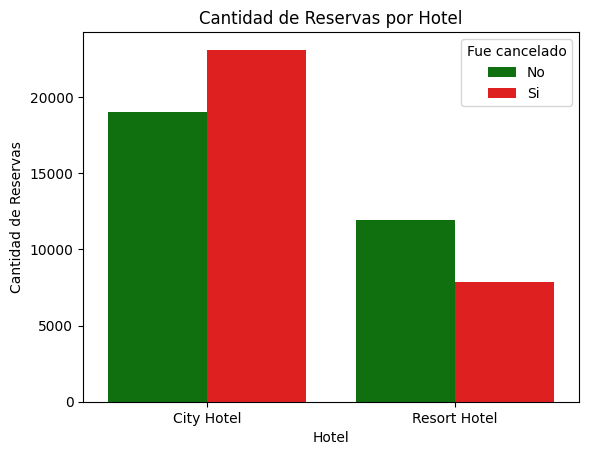

In [12]:
sns.countplot(
    data = DF_HOTEL,
    x = "hotel",
    hue = "is_canceled",
    palette=["green", "red"],
)

plt.title("Cantidad de Reservas por Hotel")
plt.xlabel("Hotel")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Hubo más cancelaciones en City Hotel que en Resort Hotel, por lo tanto, el hotel infiere en la cancelación.

### Cantidad de Reservas por Tiempo de Espera

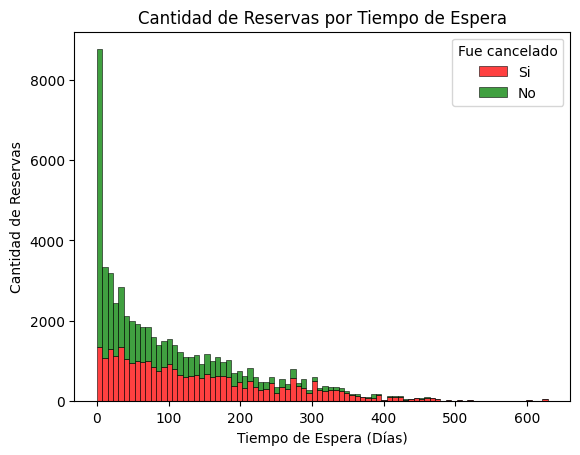

In [13]:
sns.histplot(
    data = DF_HOTEL,
    x = "lead_time",
    hue = "is_canceled",
    multiple = "stack",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas por Tiempo de Espera")
plt.xlabel("Tiempo de Espera (Días)")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["Si", "No"])


Se puede observar que, a mayor tiempo de espera, hubo más cancelaciones.

### Cantidad de Reservas por Año

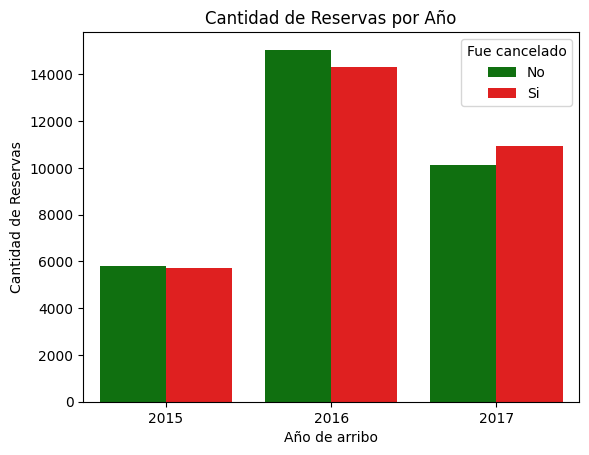

In [14]:
sns.countplot(
    data = DF_HOTEL,
    x = "arrival_date_year",
    hue = "is_canceled",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas por Año")
plt.xlabel("Año de arribo")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Existen mínimas diferencias entre si fue cancelado o no en cada año, podría considerarse irrelevante.

### Cantidad de Reservas por Mes

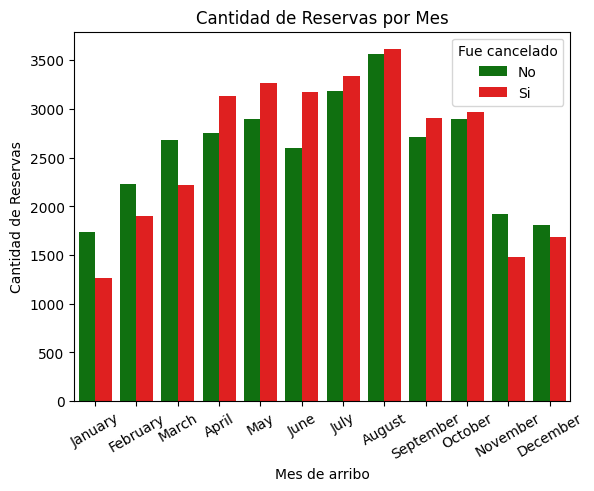

In [15]:
index = ["January","February","March","April","May","June","July","August","September","October","November","December"]

sns.countplot(
    data = DF_HOTEL,
    x = "arrival_date_month",
    hue = "is_canceled",
    order = index,
    palette=["green", "red"],
)

plt.title("Cantidad de Reservas por Mes")
plt.xlabel("Mes de arribo")
plt.xticks(rotation = 30)
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Según el mes hubo más o menos cancelaciones.

### Cantidad de Reservas por Semana

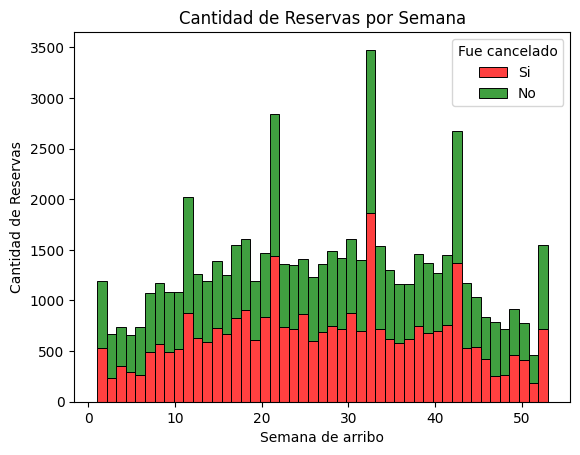

In [16]:
sns.histplot(
    data = DF_HOTEL,
    x = "arrival_date_week_number",
    hue = "is_canceled",
    multiple = "stack",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas por Semana")
plt.xlabel("Semana de arribo")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["Si", "No"])


En el gráfico se puede observar que en general las cancelaciones son proporcionales a la cantidad de reservas, asi que no se puede obtener información relevante para el análisis.

### Cantidad de Reservas por Día del Mes

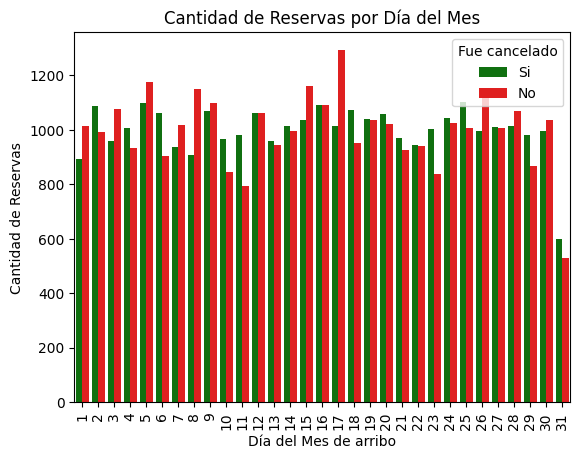

In [17]:
sns.countplot(
    data = DF_HOTEL,
    x = 'arrival_date_day_of_month',
    hue = 'is_canceled',
    palette = ['green', 'red'],
)

plt.title("Cantidad de Reservas por Día del Mes")
plt.xlabel("Día del Mes de arribo")
plt.xticks(rotation = 90)
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["Si", "No"])


Se observa que en los primeros dias del mes hay mas cancelaciones.

### Reservas por Fin de Semana y Entre Semana

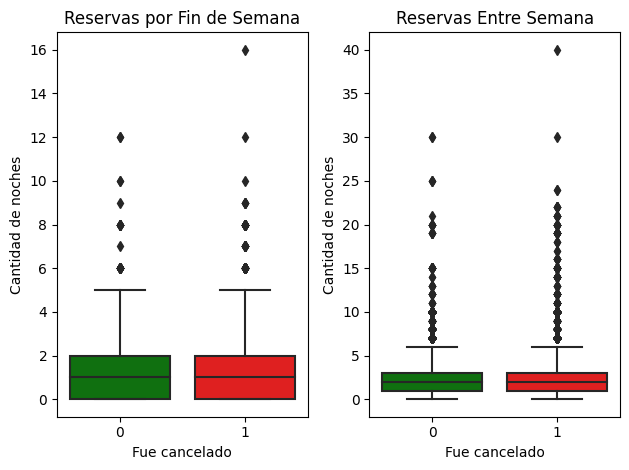

In [18]:
fig, axes = plt.subplots(1, 2)

# Boxplot Reservas por Fin de Semana
sns.boxplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "stays_in_weekend_nights",
    palette=["green", "red"],
    ax = axes[0],
)
axes[0].set_title("Reservas por Fin de Semana")
axes[0].set_xlabel("Fue cancelado")
axes[0].set_ylabel("Cantidad de noches")

# Boxplot Reservas Entre Semana
sns.boxplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "stays_in_week_nights",
    palette = ["green", "red"],
    ax = axes[1],
)
axes[1].set_title("Reservas Entre Semana")
axes[1].set_xlabel("Fue cancelado")
axes[1].set_ylabel("Cantidad de noches")

plt.tight_layout()
plt.show()

La probabilidad de cancelación de la reserva es bastante pareja según la cantidad de noches reservadas durante el fin de semana, no estaría aportando. En cambio, si se reservó entre semana, si puede diferir la cantidad de noches con la cancelación.

### Cantidad de Adultos/Niños/Bebes por Reserva

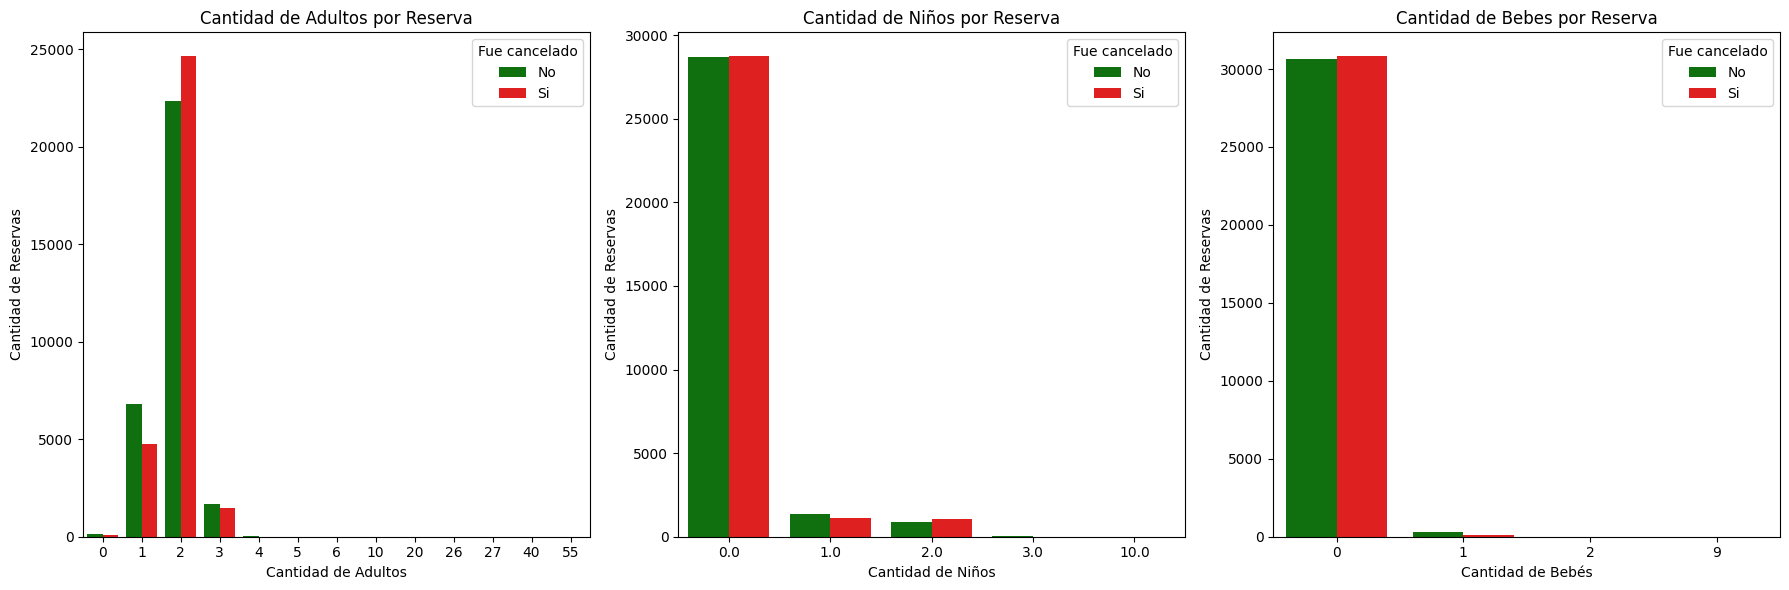

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Cantidad de Adultos por Reserva
sns.countplot(data=DF_HOTEL, x="adults", hue="is_canceled", palette=["green", "red"], ax=axes[0])
axes[0].set_title("Cantidad de Adultos por Reserva")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].set_xlabel("Cantidad de Adultos")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

#Cantidad de Niños por Reserva
sns.countplot(data=DF_HOTEL, x="children", hue="is_canceled", palette=["green", "red"], ax=axes[1])
axes[1].set_title("Cantidad de Niños por Reserva")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].set_xlabel("Cantidad de Niños")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])

#Cantidad de reservas por bebés
sns.countplot(data=DF_HOTEL, x="babies", hue="is_canceled", palette=["green", "red"], ax=axes[2])
axes[2].set_title("Cantidad de Bebes por Reserva")
axes[2].set_ylabel("Cantidad de Reservas")
axes[2].set_xlabel("Cantidad de Bebés")
axes[2].legend(title="Fue cancelado", labels=["No", "Si"])

plt.tight_layout()
plt.show()

Niños/Bebes no relevante.

### Cantidad de Reservas por Tipo de Pensión

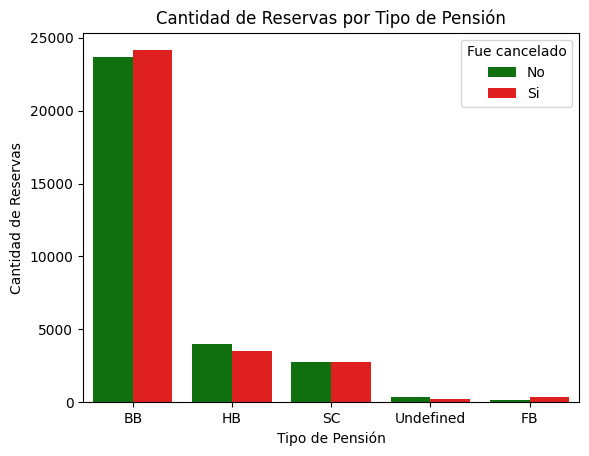

In [20]:
sns.countplot(
    data = DF_HOTEL,
    x = "meal",
    hue = "is_canceled",
    palette=["green", "red"],
)

plt.title("Cantidad de Reservas por Tipo de Pensión")
plt.xlabel("Tipo de Pensión")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No","Si"])


Se observa que las cancelaciones son proporcionales a la cantidad de reservas que hay por cada tipo de pension, asi que no se puede obtener información relevante.

### Cantidad de Reservas por País de Orígen

In [21]:
paises_con_mas_registros = DF_HOTEL["country"].value_counts().head(10).index
registros_paises_con_mas_reservas = DF_HOTEL[DF_HOTEL["country"].isin(paises_con_mas_registros)]

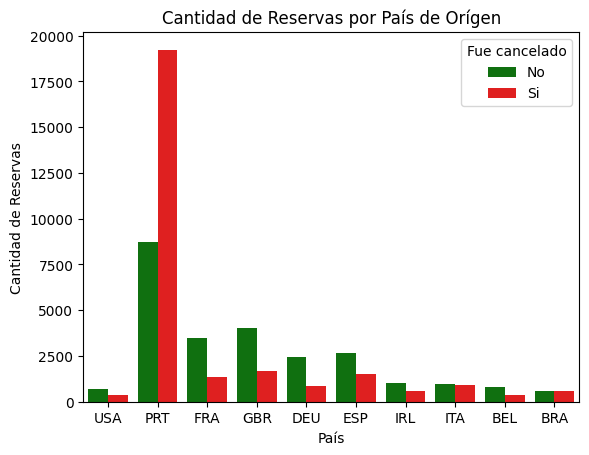

In [22]:
sns.countplot(
    data = registros_paises_con_mas_reservas,
    x = "country",
    hue = "is_canceled",
    palette=["green", "red"]
)

plt.title("Cantidad de Reservas por País de Orígen")
plt.xlabel("País")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No","Si"])


Se detallan los 10 países con más reservas para poder visualizar mejor el gráfico, se observa que la cantidad de cancelaciones según el país es relevante para el análisis.

### Cantidad de Reservas por Segmento de Mercado y Canal de Distribución

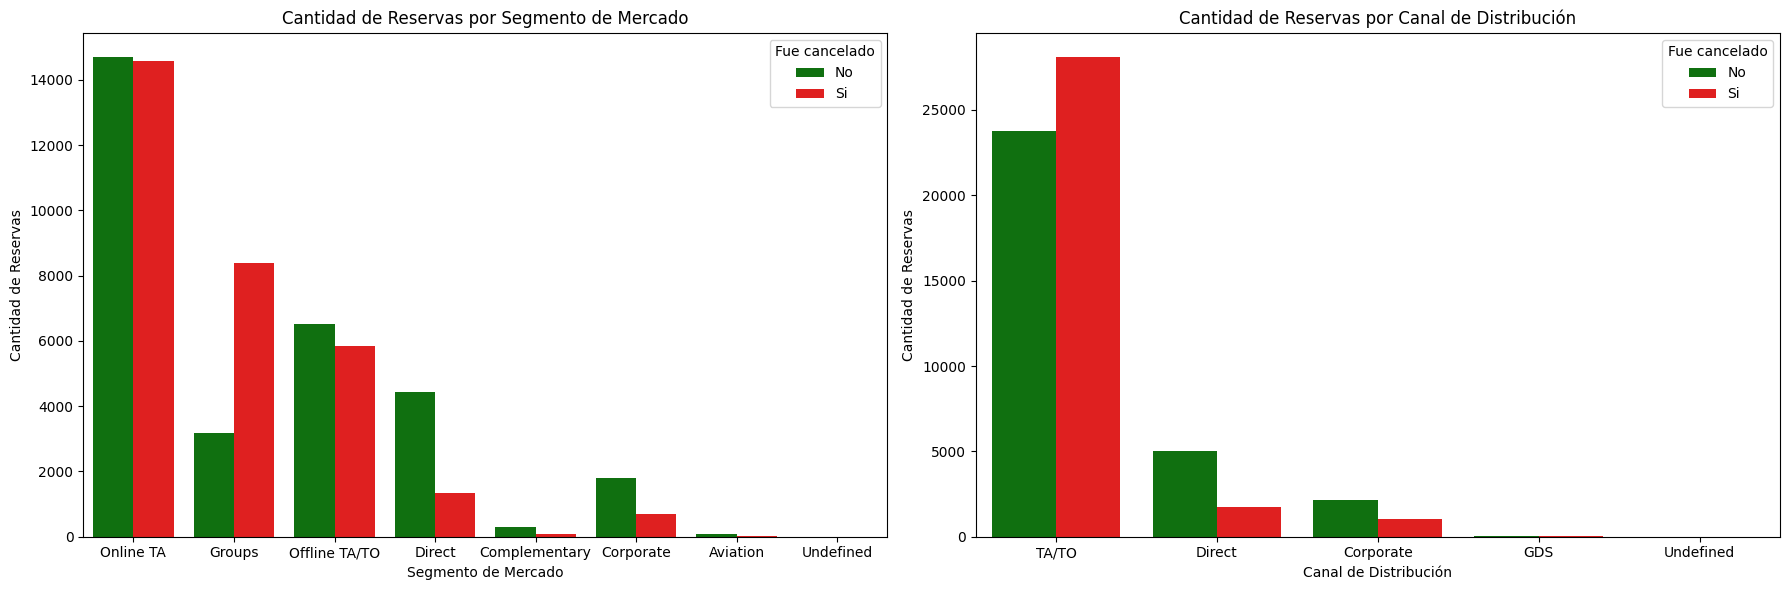

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot Cantiad de Reservas por Segmento de Mercado
sns.countplot(data=DF_HOTEL, x="market_segment", hue="is_canceled", palette=["green", "red"], ax=axes[0])
axes[0].set_title("Cantidad de Reservas por Segmento de Mercado")
axes[0].set_xlabel("Segmento de Mercado")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

# Countplot Cantiad de Reservas por Canal de Distribución
sns.countplot(data=DF_HOTEL, x="distribution_channel", hue="is_canceled", palette=["green", "red"],  ax=axes[1])
axes[1].set_title("Cantidad de Reservas por Canal de Distribución")
axes[1].set_xlabel("Canal de Distribución")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])

plt.tight_layout()
plt.show()

Dado que se observa que hay dos variables que pueden inferir en las cancelaciones (Group y Direct, en Segmento de Mercado) y que la cantidad de registros que éstas poseen es considerable respecto a la cantidad total de registros podría llegar a considerarse relevante. En cambio, con el canal de distribución no se observa una tendencia que pueda aportar al análisis.

### Cantidad de Reservas por Repetición y con Cancelaciones Previas

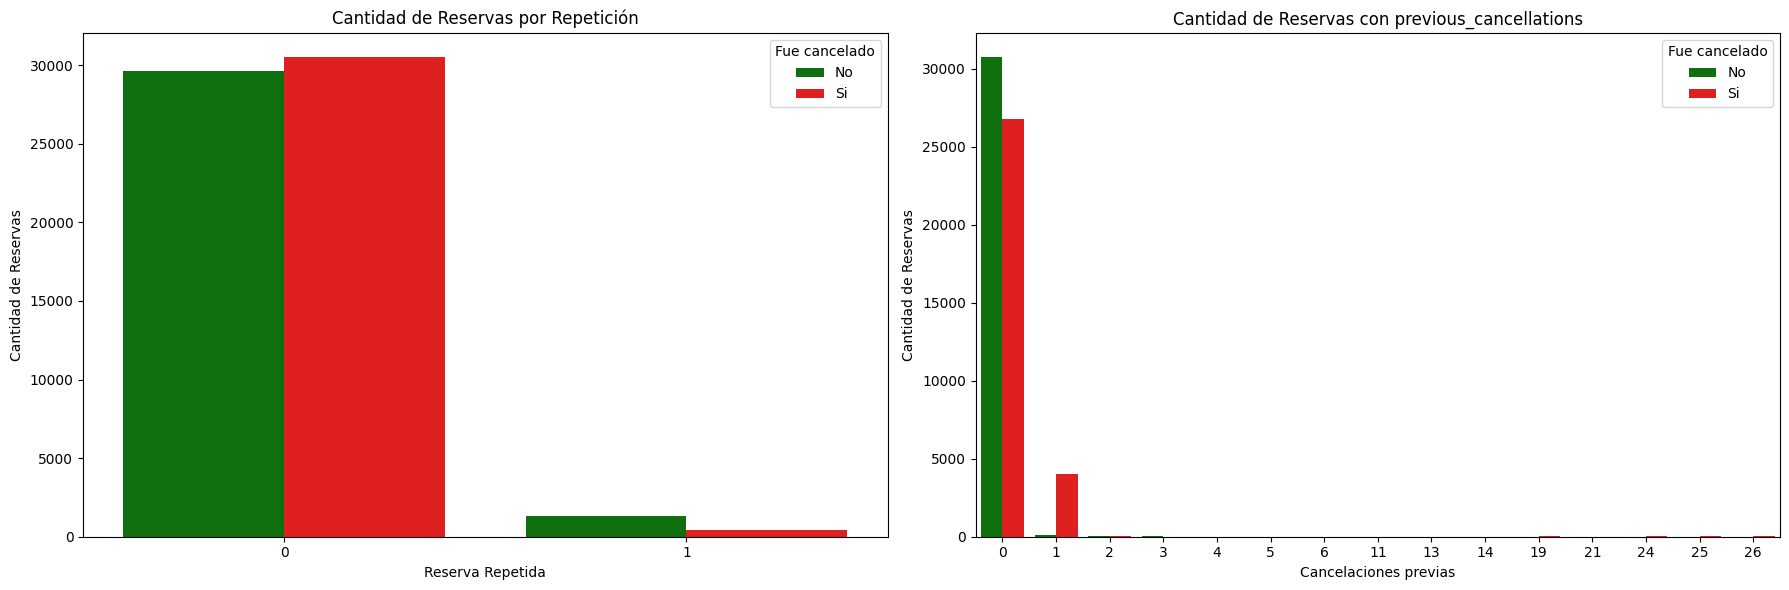

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot Cantidad de Reservas de Clientes Nuevos
sns.countplot(data=DF_HOTEL, x="is_repeated_guest", hue="is_canceled", palette=["green", "red"], ax=axes[0])
axes[0].set_title("Cantidad de Reservas por Repetición")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].set_xlabel("Reserva Repetida")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

# Countplot Cantidad de Reservas con Cancelaciones Previas
sns.countplot(data=DF_HOTEL, x="previous_cancellations", hue="is_canceled", palette=["green", "red"], ax=axes[1])
axes[1].set_title("Cantidad de Reservas con previous_cancellations")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].set_xlabel("Cancelaciones previas")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])

plt.tight_layout()
plt.show()

Se observa que si el usuario tenía cancelaciones previas, hay mas probabilidad que vuelva a cancelar.

### Reservas Previas No Canceladas

Text(0, 0.5, 'Cantidad de Reservas')

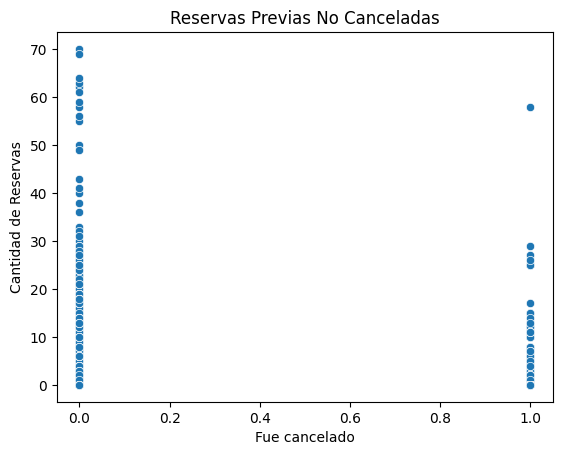

In [25]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "previous_bookings_not_canceled",
)

plt.title("Reservas Previas No Canceladas")
plt.xlabel("Fue cancelado")
plt.ylabel("Cantidad de Reservas")


En la mayoría de los registros no hubo reservas previas no canceladas y en las cuales si las hubo no cancelaron.

### Cantidad de Reservas por Tipo de Habitación y Habitación Asignada a la Reserva

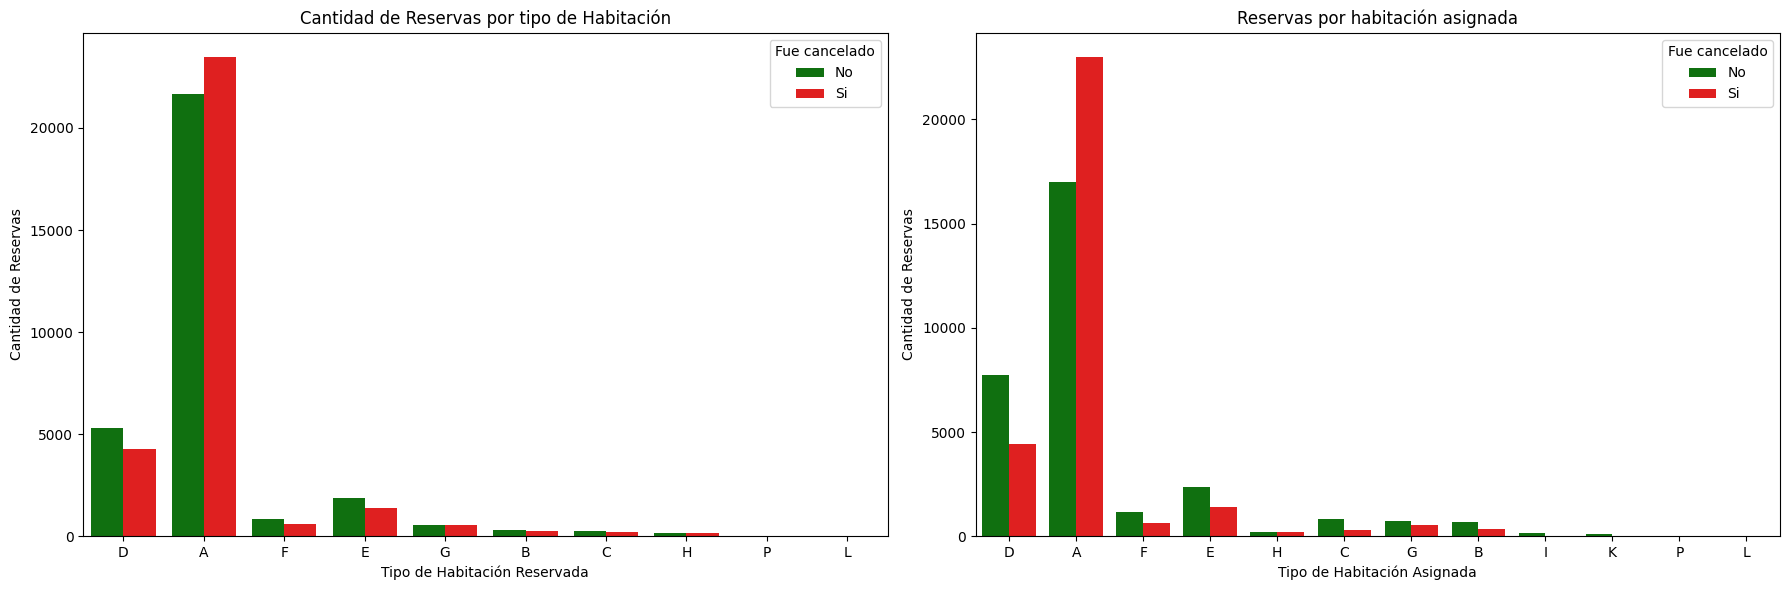

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Countplot Cantidad de Reservas por Tipo de Habitación
sns.countplot(x="reserved_room_type", hue="is_canceled", data=DF_HOTEL, ax=axes[0], palette=["green", "red"])
axes[0].set_title("Cantidad de Reservas por tipo de Habitación")
axes[0].set_xlabel("Tipo de Habitación Reservada")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

# Countplot Habitación Asignada a la Reserva
sns.countplot(x="assigned_room_type", hue="is_canceled", data=DF_HOTEL, ax=axes[1], palette=["green", "red"])
axes[1].set_title("Reservas por habitación asignada")
axes[1].set_xlabel("Tipo de Habitación Asignada")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])

plt.tight_layout()
plt.show()

Se observa que dependiendo de la habitación asignada hubo más/menos cancelaciones.

### Cantidad de Reservas con Cambios

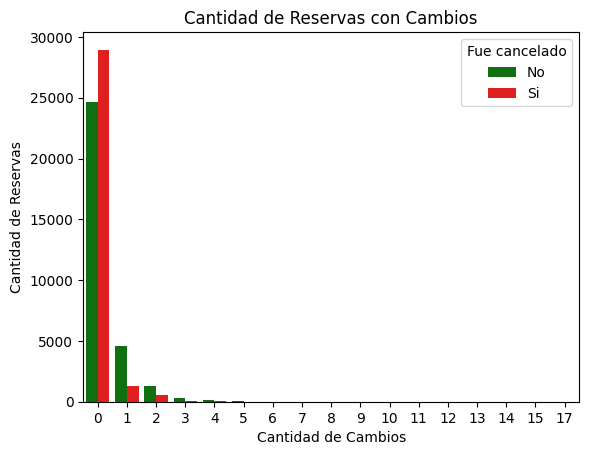

In [27]:
sns.countplot(
    data = DF_HOTEL,
    x = "booking_changes",
    hue = "is_canceled",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas con Cambios")
plt.xlabel("Cantidad de Cambios")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


La probabilidad de que se produzcan cancelaciones tiende a ser menor cuando se realizan cambios en la reserva.

### Cantidad de Reservas por Tipo de Deposito

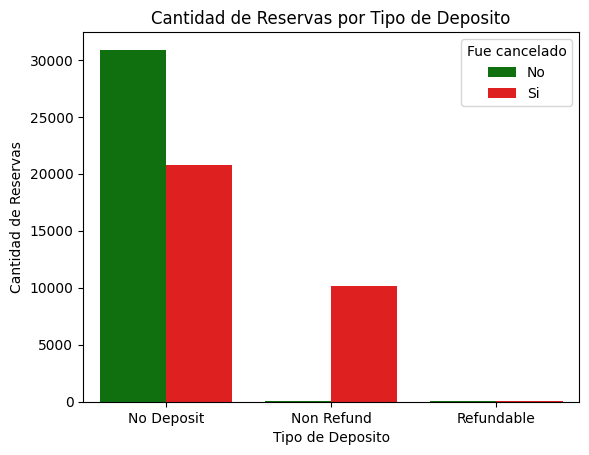

In [28]:
sns.countplot(
    data = DF_HOTEL,
    x = "deposit_type",
    hue = "is_canceled",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas por Tipo de Deposito")
plt.xlabel("Tipo de Deposito")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Si reservó sin depositar es mas probable que NO cancele, en cambio si reservó con depósito sin reembolso la probabilidad de que cancele es alta.

### Cantidad de Reservas por Agencia

In [29]:
agencias_con_mas_reservas = DF_HOTEL["agent"].value_counts().head(5).index
registros_agencias_con_mas_reservas = DF_HOTEL[DF_HOTEL["agent"].isin(agencias_con_mas_reservas)]


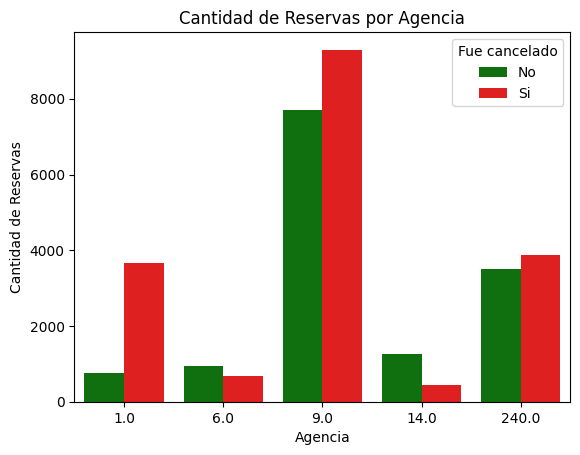

In [30]:
sns.countplot(
    data=registros_agencias_con_mas_reservas,
    x = "agent",
    hue = "is_canceled",
    palette = ["green", "red"]
)

plt.title("Cantidad de Reservas por Agencia")
plt.xlabel("Agencia")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


En el gráfico se observa que hay una tendencia a cancelar en la Agencia con Id 1, sin embargo, también se observa que hay un gran cantidad de datos faltantes (se analizará con más detalle en el análisis de datos faltantes), entonces todavía no puede considerarse relevante hasta ver el análisis.

### Cantidad de Datos en Compañías

In [31]:
porcentaje_datos_faltantes = (DF_HOTEL["company"].isnull().sum() / len(DF_HOTEL)) * 100
porcentaje_datos_presentes = 100 - porcentaje_datos_faltantes


Text(0.5, 1.0, '% Datos Faltantes de Compañías')

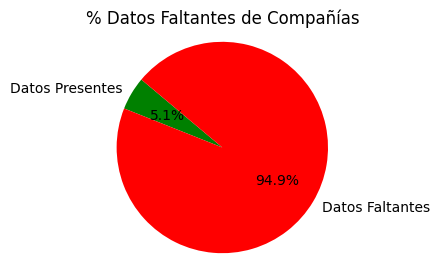

In [32]:
plt.figure(figsize=(3, 3))

plt.pie(
    x = [porcentaje_datos_presentes, porcentaje_datos_faltantes],
    labels = ["Datos Presentes", "Datos Faltantes"],
    colors = ["green", "red"],
    autopct = "%1.1f%%",
    startangle = 140,
)

plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("% Datos Faltantes de Compañías")


Como el porcentaje de datos faltantes es muy elevado se puede descartar la variable

### Cantidad de Días de Espera por Reserva

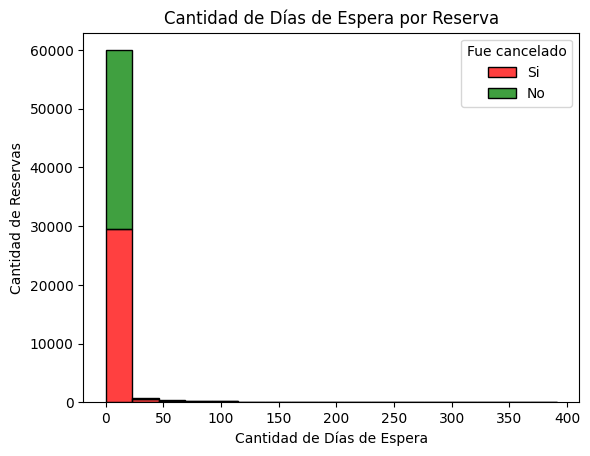

In [33]:
sns.histplot(
    data = DF_HOTEL,
    x = "days_in_waiting_list",
    hue = "is_canceled",
    multiple = "stack",
    palette = ["green", "red"],
)

plt.title("Cantidad de Días de Espera por Reserva")
plt.xlabel("Cantidad de Días de Espera")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["Si", "No"])


Se observa que en la mayoria de los registros no hubo días de espera, pero en las cuales si lo hubo tiende a cancelar.

### Cantidad de Reservas por Tipo de Cliente

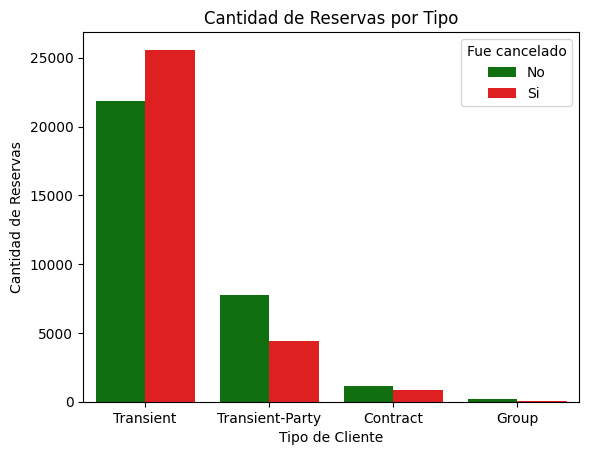

In [34]:
sns.countplot(
    data = DF_HOTEL,
    x = "customer_type",
    hue = "is_canceled",
    palette = ["green", "red"]
)

plt.title("Cantidad de Reservas por Tipo")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Hay una tendencia a cancelar o no en cada tipo

### Cantidad de Reservas por Cantidad de Espacios de Cochera

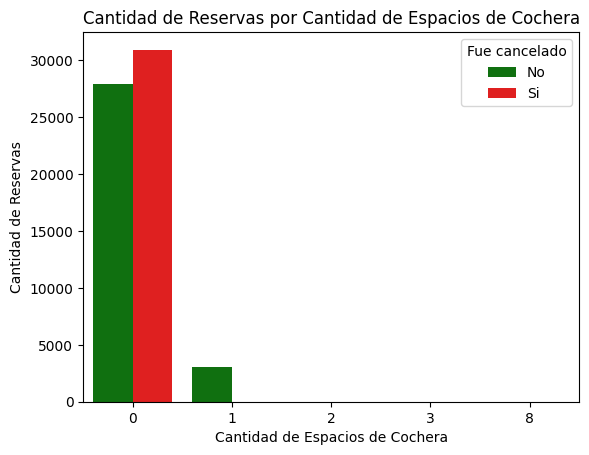

In [35]:
sns.countplot(
    data = DF_HOTEL,
    x = "required_car_parking_spaces",
    hue = "is_canceled",
    palette=["green", "red"]
)

plt.title("Cantidad de Reservas por Cantidad de Espacios de Cochera")
plt.xlabel("Cantidad de Espacios de Cochera")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Se observa que cuando se reservó espacio de estacionamiento la probabilidad de cancelación es mínima.

### Cantidad de Reservas por Cantidad de Pedidos Especiales

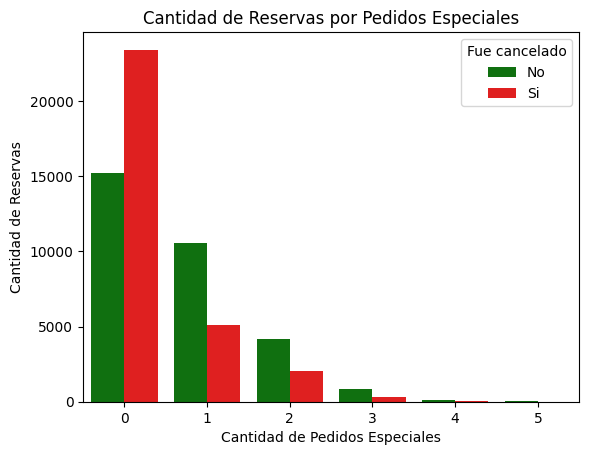

In [36]:
sns.countplot(
    data = DF_HOTEL,
    x = "total_of_special_requests",
    hue = "is_canceled",
    palette = ["green", "red"],
)

plt.title("Cantidad de Reservas por Pedidos Especiales")
plt.xlabel("Cantidad de Pedidos Especiales")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


Cuando se realizan pedidos especiales es menos probable que cancelen.

### Conclusiones

Luego de un análisis, se determinó que las siguientes variables son irrelevantes para el análisis

* id
* company
* arrival_date_year
* arrival_date_month
* arrival_week_number
* arriva_date_day_of_month
* stays_in_weekend_nigths
* children
* babies
* meal
* distribution_channel
* required_car_parking_spaces

El *id* es sólo una identificación de la operación, por lo tanto no aporta información de interes para alcanzar nuestro objetivo.
El campo *company* al tener gran cantidad de datos faltantes se decidió directamente eliminarla.

Con las demás variables, mediante el anális gráfico visto y explicado anteriormente, se determino que **NO** hay una tendencia marcada a la cancelación o no cancelación de la reserva.


## Análisis de Correlación

### Pairplot

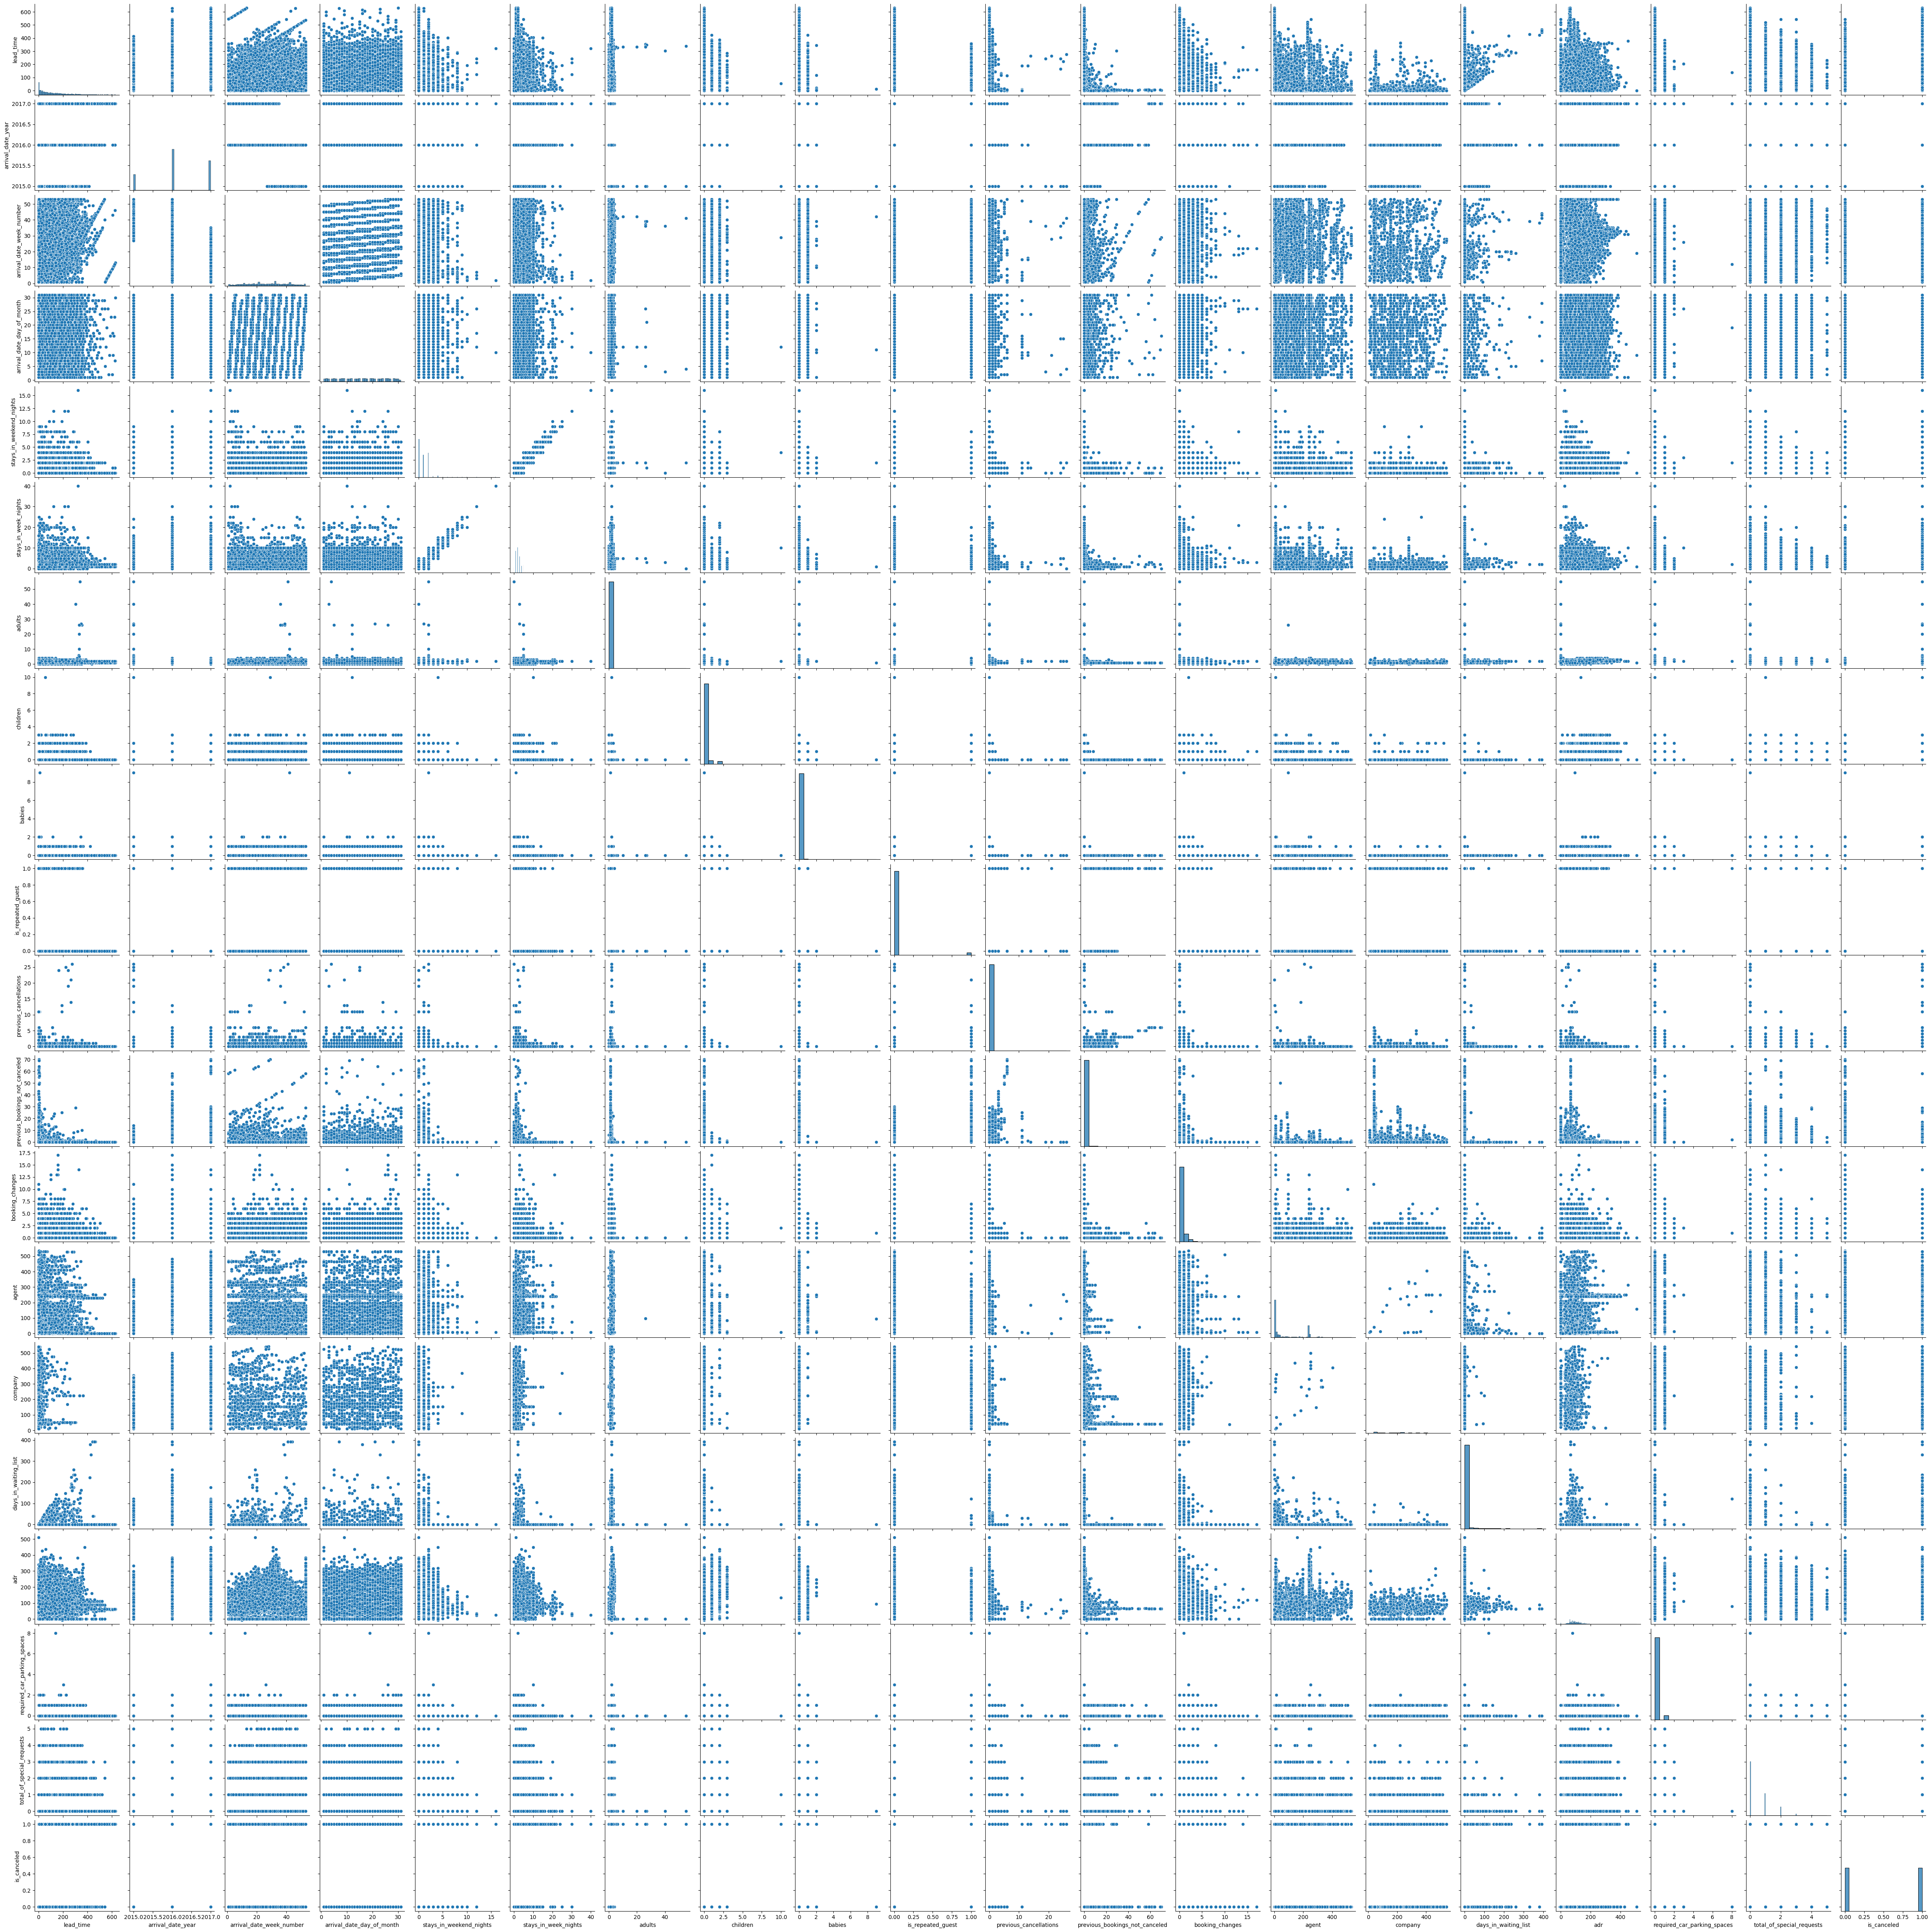

In [37]:
sns.pairplot(DF_HOTEL)

### Matriz de Correlación y Heatmap

In [38]:
matriz_correlacion = DF_HOTEL.corr()

<ipython-input-38-a2037ceb86c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = DF_HOTEL.corr()


<Axes: >

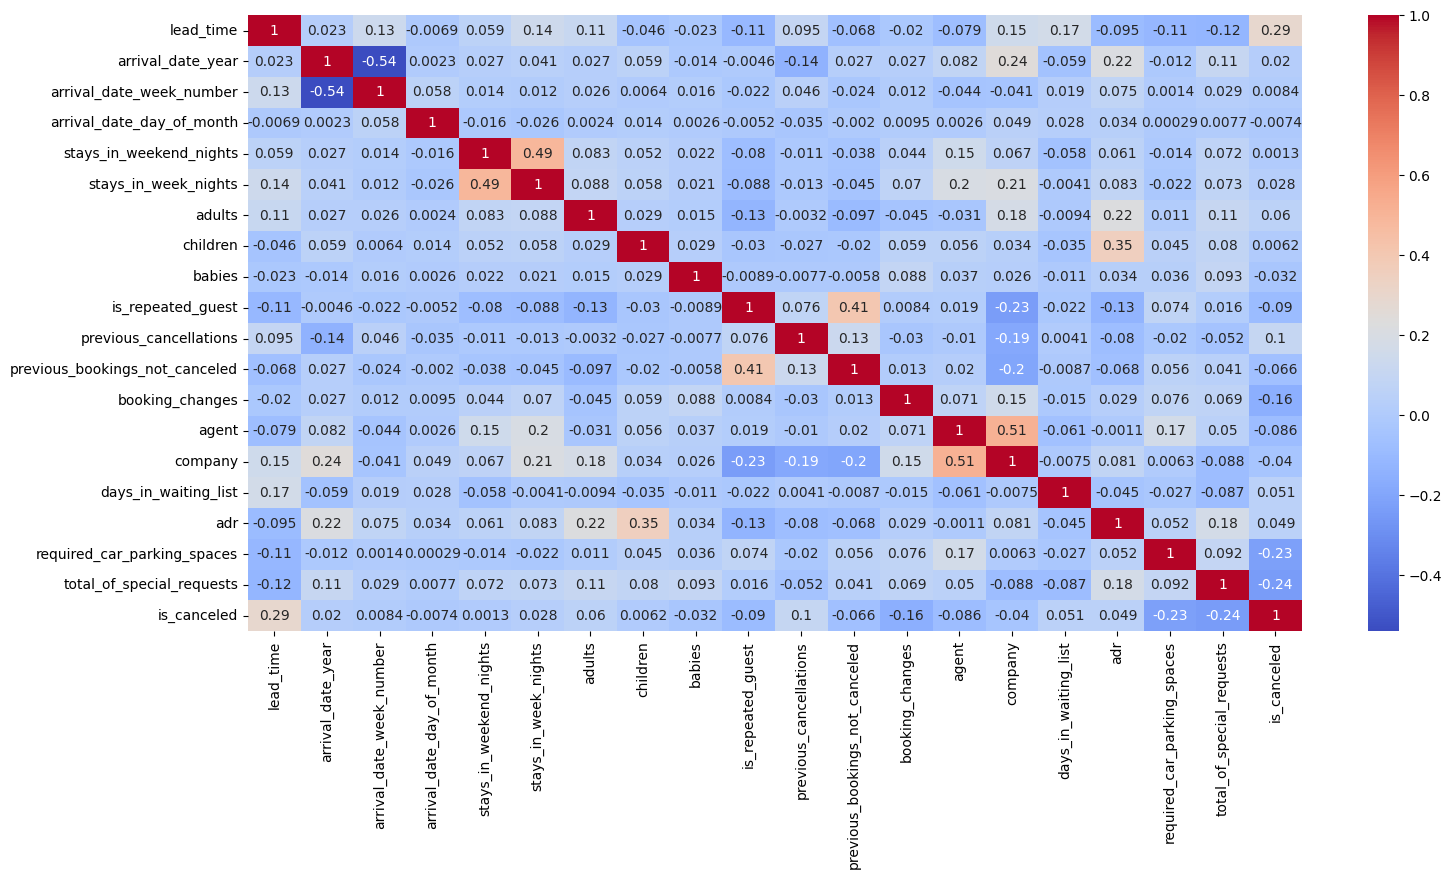

In [39]:
plt.figure(figsize = (17,8))

sns.heatmap(
    data = matriz_correlacion,
    annot = True,
    cmap = "coolwarm"
)


### Análisis

**Las variables que se va a tener mayor consideración son aquellas que muestran una correlación media o fuerte, es decir, que su valor es cercano a 1 o -1:**

**Correlación Positiva (Cercanas a 1):**

Cuando el valor de una de las variables aumenta el valor de la otra también.

*Correlacion positiva fuerte*
* stays_in_week_nights - stays_in_weekend_nights = 0.49
* previous_booking_not_canceled - is_repeated_guest = 0.41
* company - agent = 0.51

*Correlacion positiva media:*
* adr - children = 0.35
* agent - stays_in_week_nights = 0.20
* adr - arrival_date_year = 0.22
* adr - adults = 0.22
* is_canceled - lead_time = 0.29
* company - arrival_date_year = 0.24
* company - stay_in_week_nights = 0.21

**Correlación Negativa (Cercanas a -1):**

Cuando el valor de una de las variables aumenta el valor de la otra disminuye.

*Correlación negativa fuerte*
* arrival_date_week_number - arrival_date_year = -0.54

*Correlación negativa media:*
* is_canceled - required_car_parking_spaces = -0.23
* is_canceled - total_of_special_requests = -0.24
* company - previous_bookings_not_canceled = -0.20
* company - is_repeated_guest = -0.23

**NOTA:**
Se va a considerar que las correlaciones fuertes van a ser de 0.4 en adelante y las medias de 0.2 hasta 0.4 (sin incluir).

Se va a realizar un gráfico de dispersión con las variables que muestran una correlación ***fuerte*** para asi ver con más detalle como se relacionan.

### Noches Entre Semana y Noches en Fin de Semana -> Correlación = 0.49

Text(0, 0.5, 'Noches Entre Semana')

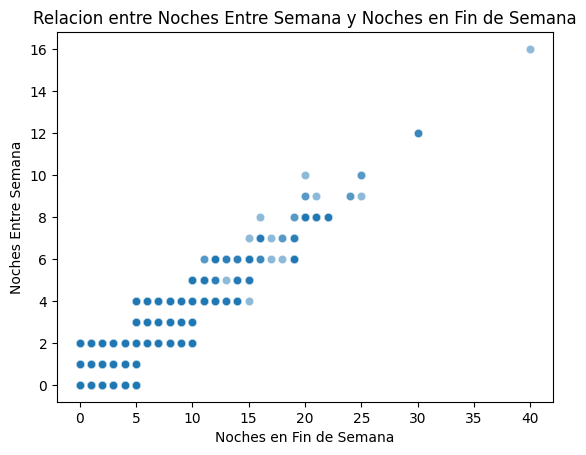

In [40]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "stays_in_week_nights",
    y = "stays_in_weekend_nights",
    alpha = 0.5
)

plt.title("Relacion entre Noches Entre Semana y Noches en Fin de Semana")
plt.xlabel("Noches en Fin de Semana")
plt.ylabel("Noches Entre Semana")


En el gráfico se observa que al aumentar las noches entre semana reservados también aumentan la cantidad de noches en fin de semana.

### Reservas Previas No Canceladas y Cliente Repetido -> Correlación = 0.41

Text(0, 0.5, 'Cliente Repetido')

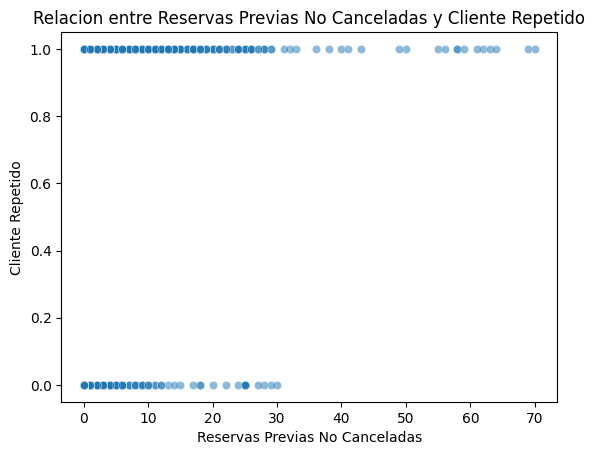

In [41]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "previous_bookings_not_canceled",
    y = "is_repeated_guest",
    alpha = 0.5
)

plt.title("Relacion entre Reservas Previas No Canceladas y Cliente Repetido")
plt.xlabel("Reservas Previas No Canceladas")
plt.ylabel("Cliente Repetido")


En el gráfico se observa que las reservas hechas por clientes repetidos, es decir, clientes que volvieron a reservar en el mismo hotel, tienen más cantidad de reservas NO canceladas y los clientes nuevos tienen menos reservas no canceladas, dando a entender que un cliente nuevo tiene más probabilidad de cancelar una reserva.

Esto podría aportar al análisis, por lo tanto, se consideran estas variables relevantes.

### Compañia y Agencia -> Correlación = 0.51

Text(0, 0.5, 'Agencia')

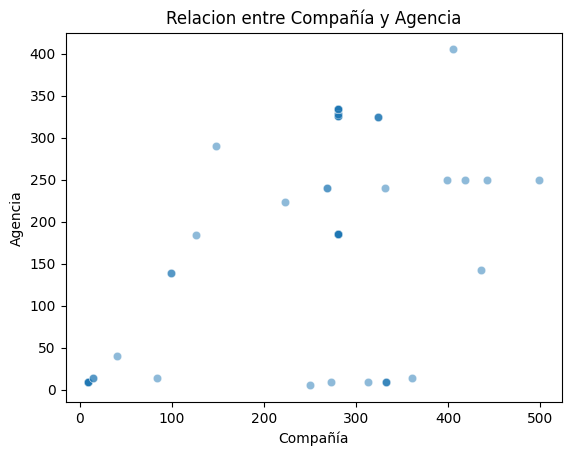

In [42]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "company",
    y = "agent",
    alpha = 0.5,
)

plt.title("Relacion entre Compañía y Agencia")
plt.xlabel("Compañía")
plt.ylabel("Agencia")


agent: id de la agencia de viajes

company: id de la empresa que realizó la reserva o responsable del pago.

Ambas variables son irrelavantes por ende no se va a realizar un análisis.

### Número de Semana de arribo y Año de arribo -> Correlación = -0.54

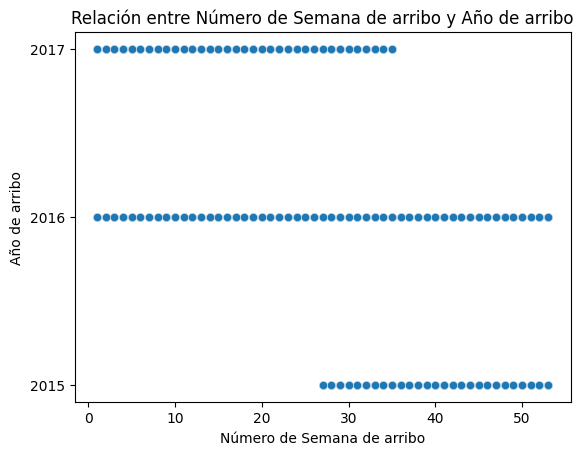

In [43]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "arrival_date_week_number",
    y = "arrival_date_year",
    alpha = 0.5,
)

plt.title("Relación entre Número de Semana de arribo y Año de arribo")
plt.xlabel("Número de Semana de arribo")
plt.ylabel("Año de arribo")
plt.yticks(DF_HOTEL["arrival_date_year"].unique())

plt.show()


Variables irrelevantes.

## Análisis de la relación de las variables con el target (is_canceled)

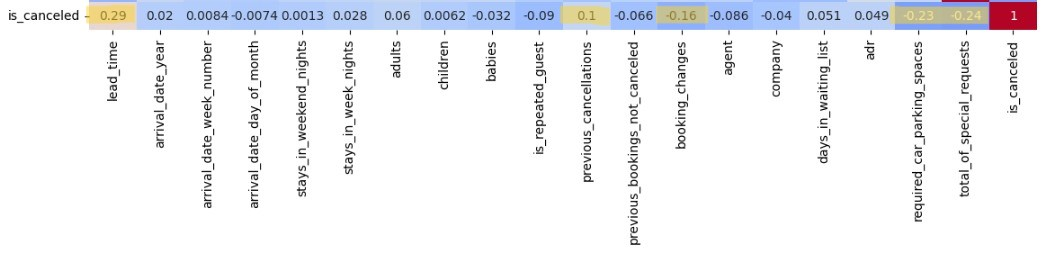

Se va a tener en cuenta las variables relevantes para el análisis y las que tienen una mayor correlación con el target (is_canceled)

### Variables que consideramos relevantes

* **lead_time**: cantidad de días desde la fecha de reserva y la fecha de llegada  ***-> CORRELACION POSITIVA MEDIA***.
* **previous_cancellations**: cantidad de reservas canceladas anteriormente  ***-> CORRELACION POSITIVA LEVE***.
* **previous_bookings_not_canceled**: cantidad de reservas anteriores no canceladas del cliente antes de la reserva actual.
* **booking_changes**: cantidad de cambios en la reserva  ***-> CORRELACION NEGATIVA LEVE***.
* **days_in_waiting_list**: cantidad de días de la reserva en lista de espera antes de la confirmación.
* **is_repeated_guest**: la reserva fue de un cliente repetido(1) o no(0)
* **deposit_type**: indicación si el cliente realizó un depósito para garantizar la reserva.


### Variables irrelevantes pero que tienen correlación con el target

* **required_car_parking_spaces**: cantidad de plazas de aparcamiento necesarias ***-> CORRELACION NEGATIVA MEDIA***
* **total_of_special_requests**: cantidad de solicitudes especiales del cliente ***-> CORRELACION NEGATIVA MEDIA***

### Gráficos de éstas variables con el target

#### Relación entre Lead time y el target

Text(0, 0.5, 'Tiempo de arribo (Días)')

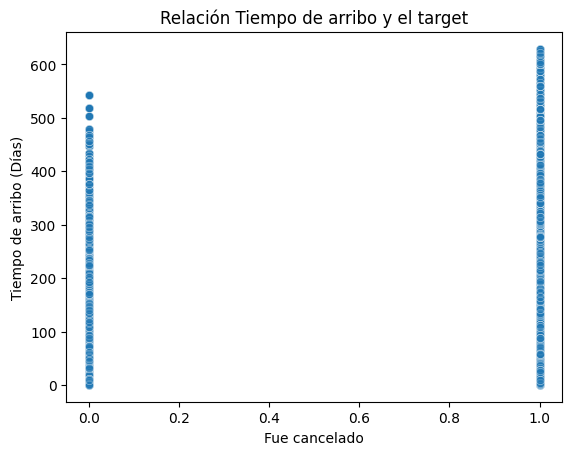

In [44]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "lead_time",
    alpha = 0.5
)

plt.title("Relación Tiempo de arribo y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Tiempo de arribo (Días)")


**lead_time:** cantidad de días desde la fecha de reserva y la fecha de llegada **-> CORRELACION POSITIVA MEDIA**

Entre todas las variables esta es la que tiene mayor correlación con el target.
  
En el gráfico se  observa que cuanto mayor es el tiempo de arribo mayor es la cantidad de cancelaciones, por lo tanto, esta variable puede aportar al análisis.

#### Relación entre Cancelaciones Previas y el target

Text(0, 0.5, 'Cancelaciones Previas')

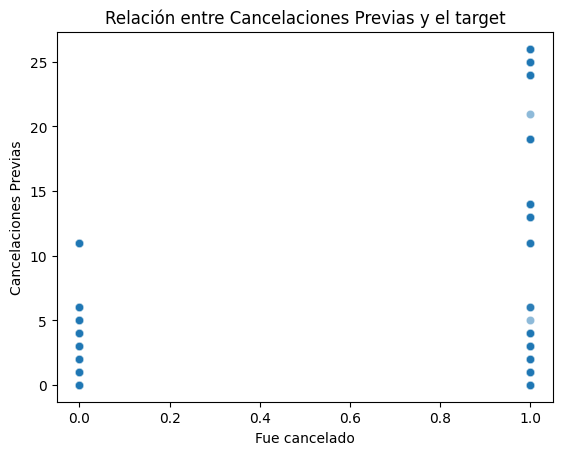

In [45]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "previous_cancellations",
    alpha=0.5
)

plt.title("Relación entre Cancelaciones Previas y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Cancelaciones Previas")


**previous_cancellations:** cantidad de reservas canceladas anteriormente **-> CORRELACION POSITIVA LEVE**

Ésta variable podría servir para analizar si se va cancelar una reserva, ya que si el cliente tiene una cantidad alta de reservas canceladas anteriormente uno puede suponer de que es muy probable que vuelva a cancelar en un futuro.

En el gráfico se puede observar que a mayor cantidad de cancelaciones previas, hay más probabilidad de cancelar la reserva actual.

#### Relación entre Cambios en las Reservas y el target

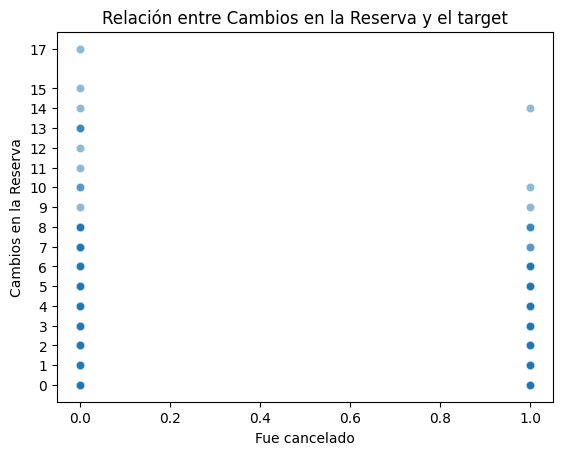

In [46]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "booking_changes",
    alpha = 0.5
)

plt.title("Relación entre Cambios en la Reserva y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Cambios en la Reserva")
plt.yticks(DF_HOTEL["booking_changes"].unique())

plt.show()


**booking_changes:** cantidad de cambios en la reserva  ***-> CORRELACIÓN NEGATIVA LEVE***

Se podría considerar variable relevante, ya que si la persona que realiza la reserva solicita varios cambios sobre la misma, da a entender de que no tiene intenciones de cancelarla.

En el gráfico se puede observar que a partir de los 10 cambios en adelante hay menor cantidad de cancelaciones. Sin embargo de los 10 cambios para abajo es bastante similar la cantidad de cancelaciones con las que no fueron canceladas, por ende se puede considerar relevante para el análisis.

#### Relación entre Espacios en Cocheras y el target

**required_car_parking_spaces:** cantidad de plazas de aparcamiento necesarias -> **CORRELACION NEGATIVA MEDIA**

Apesar de que esta variable se consideró irrelavente para el análisis, en la matriz de correlaciones se ve que tiene una correlación negativa media con el target.

En el gráfico se puede observar que la mayoría de las cancelaciones no incluyen espacio de cochera.

Text(0, 0.5, 'Espacios en Cochera')

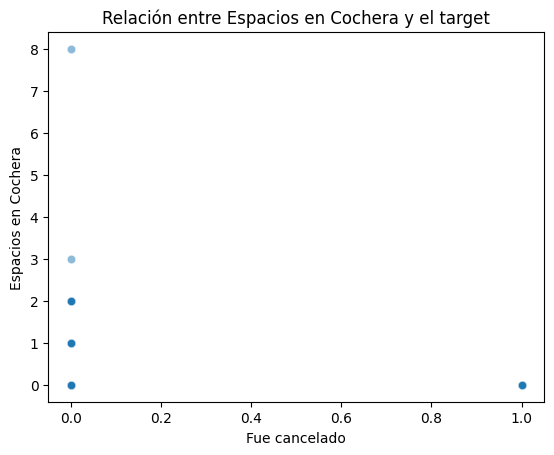

In [47]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "required_car_parking_spaces",
    alpha = 0.5
)

plt.title("Relación entre Espacios en Cochera y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Espacios en Cochera")


#### Relación entre Cantidad de Pedidos Especiales y el target

Text(0, 0.5, 'Cantidad de Pedidos Especiales')

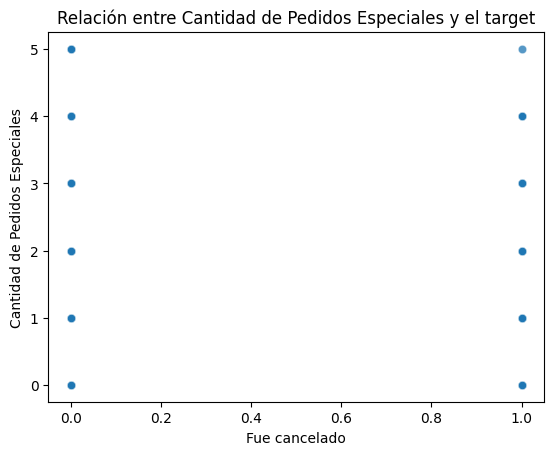

In [48]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "total_of_special_requests",
    alpha = 0.5
)

plt.title("Relación entre Cantidad de Pedidos Especiales y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Cantidad de Pedidos Especiales")


**total_of_special_requests:** cantidad de solicitudes especiales del cliente **-> CORRELACION NEGATIVA MEDIA**

Apesar de que esta variable se consideró irrelavente para el análisis, en la matriz de correlaciones se ve que tiene una correlación negativa media con el target.

En el gráfico se observa que a mayor cantidad de solicitudes especiales realiza el cliente, existe menos probabilidad de que cancele la reserva.

#### Relación entre Días en Lista de Espera y el target

Text(0, 0.5, 'Días en Lista de Espera')

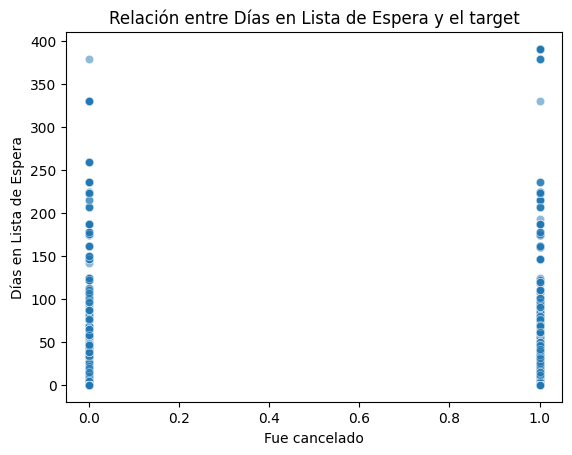

In [49]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "days_in_waiting_list",
    alpha = 0.5
)

plt.title("Relación entre Días en Lista de Espera y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Días en Lista de Espera")


**days_in_waiting_list:** cantidad de días de la reserva en lista de espera antes de la confirmación.

Apesar de que esta variable no tenga una alta correlacion con el target, se considera que es relevante, ya que si la reserva que se realizo esta por muchos días en la lista de espera hay más probabilidad de que la cancelen.

En el gráfico se observa que al aumentar los días en que la reserva esta en lista de espera más cancelaciones hay.

#### Relación entre Reservas Previas No Canceladas y el target

Text(0, 0.5, 'Reservas Previas No Canceladas')

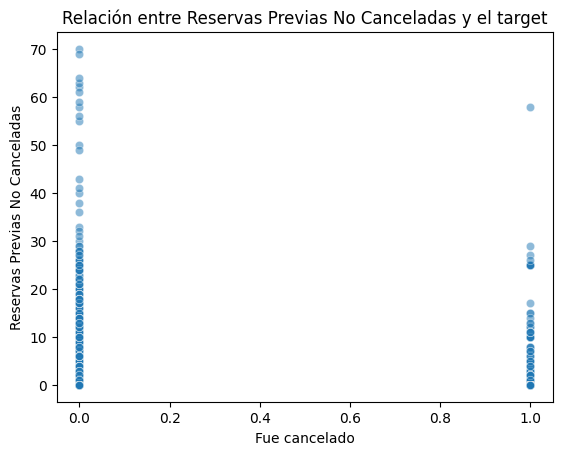

In [50]:
sns.scatterplot(
    data = DF_HOTEL,
    x = "is_canceled",
    y = "previous_bookings_not_canceled",
    alpha = 0.5
)

plt.title("Relación entre Reservas Previas No Canceladas y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Reservas Previas No Canceladas")


**previous_bookings_not_canceled:** cantidad de reservas anteriores no canceladas del cliente antes de la reserva actual.

Se considera esta variable relevante, ya que si el cliente tiene muchas reservas previas no canceladas, aumenta la posibilidad de que no cancele la reserva actual.

En el gráfico se puede observar que a medida que el cliente tiene más reservas previas NO canceladas tiende a haber menos cancelaciones.

#### Relación entre Cliente Repetido y el target

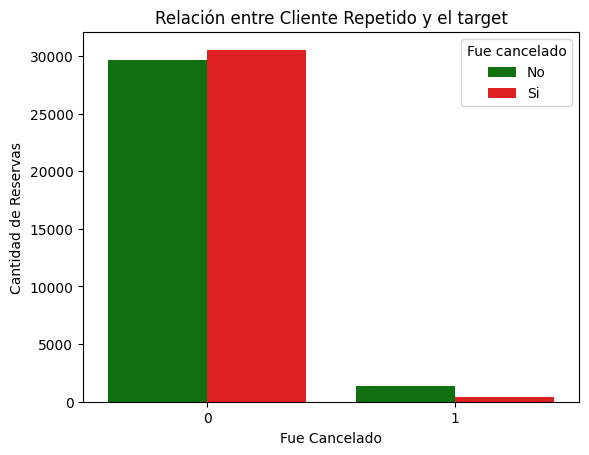

In [51]:
sns.countplot(
    data = DF_HOTEL,
    x = 'is_repeated_guest',
    hue = 'is_canceled',
    palette = ['green', 'red']
)

plt.title("Relación entre Cliente Repetido y el target")
plt.xlabel("Fue Cancelado")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=['No','Si'])


**is_repeated_guest:** la reserva fue de un cliente repetido(1) o no(0).

Se considera relevante ya que si es un cliente que estuvo anteriormente es menos probable que cancele una reserva.

En el gráfico se puede observar que, no sea una diferencia muy grande, cuando NO es un cliente repetido tiene una mayor cantidad de reservas canceladas en cambio cuando es un cliente repetido la cantidad de reservas canceladas son menores.

#### Relación entre el Tipo de Deposito y el target

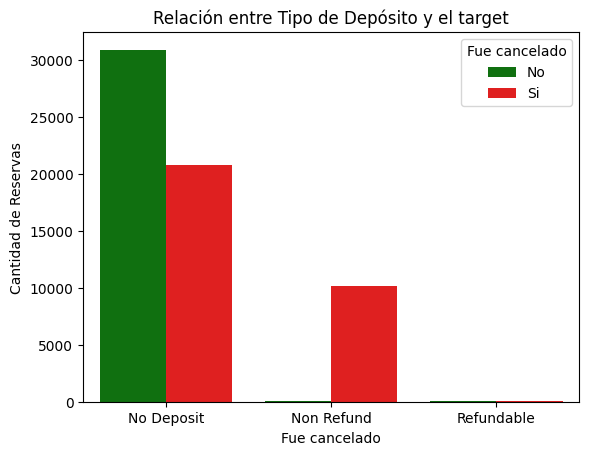

In [52]:
sns.countplot(
    data = DF_HOTEL,
    x = "deposit_type",
    hue = "is_canceled",
    palette = ["green", "red"]
)

plt.title("Relación entre Tipo de Depósito y el target")
plt.xlabel("Fue cancelado")
plt.ylabel("Cantidad de Reservas")
plt.legend(title="Fue cancelado", labels=["No", "Si"])


**deposit_type:** indica si el cliente realizó un depósito para garantizar la reserva.

Se considera relevante, ya que si el cliente realizo un un depósito para garantizar la reserva significa que no deberia tener intenciones de cancelarla.

*Análisis realizado en un grafico anterior:*

"Si reservó sin depositar es mas probable que NO cancele, en cambio, si reservó con depósito sin reembolso la probabilidad de que cancele es alta."

Ésta variable podría servir para el análisis ya que las reservas con depósito sin reembolso podrían indicar que hay una mayor probabilidad de cancelación.

# C) Datos Faltantes

A partir de este punto, toda modificación hecha, ya sea eliminación de datos o inputaciones se realizará sobre ***df_hotel_copy***.

In [53]:
filas_totales = DF_HOTEL.shape[0]
porcentaje_faltante = (DF_HOTEL.isna().sum() / filas_totales * 100).map("{:.2f}%".format)
cantidad_faltante = DF_HOTEL.isna().sum()

resultado = pd.concat([porcentaje_faltante, cantidad_faltante], axis=1)
resultado.columns = ["Porcentaje", "Cantidad"]
print(resultado)

                               Porcentaje  Cantidad
hotel                               0.00%         0
lead_time                           0.00%         0
arrival_date_year                   0.00%         0
arrival_date_month                  0.00%         0
arrival_date_week_number            0.00%         0
arrival_date_day_of_month           0.00%         0
stays_in_weekend_nights             0.00%         0
stays_in_week_nights                0.00%         0
adults                              0.00%         0
children                            0.01%         4
babies                              0.00%         0
meal                                0.00%         0
country                             0.36%       221
market_segment                      0.00%         0
distribution_channel                0.00%         0
is_repeated_guest                   0.00%         0
previous_cancellations              0.00%         0
previous_bookings_not_canceled      0.00%         0
reserved_roo

Observando los datos de las columnas vistos en el análisis anterior, las únicas columnas que tienen datos faltantes son: Children, Agent, Country y Company; a las cuales se le hará un análisis a continuación.

### Porcentaje de datos Faltantes en Children

In [54]:
porcentaje_datos_faltantes_children = (DF_HOTEL["children"].isnull().sum() / len(DF_HOTEL)) * 100
porcentaje_datos_presentes_children = 100 - porcentaje_datos_faltantes_children

Text(0.5, 1.0, '% Datos Faltantes de Children')

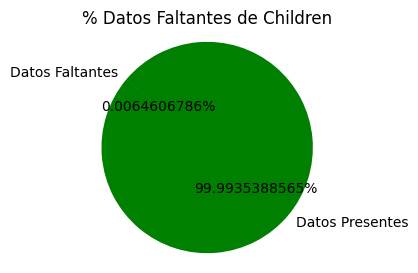

In [55]:
plt.figure(figsize=(3, 3))

plt.pie(
    x = [porcentaje_datos_presentes_children, porcentaje_datos_faltantes_children],
    labels = ["Datos Presentes", "Datos Faltantes"],
    colors = ["green", "red"],
    autopct = "%1.10f%%",
    startangle = 140,
)

plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("% Datos Faltantes de Children")

Como se analizó anteriormente (En la sección "tipo de variable y datos no nulos"), en children solo se encontraban cuatro datos faltantes, dando así un porcentaje muy bajo de datos faltantes, por ende no se puede visualizar correctamente. Para completar los datos faltantes se utilizará la mediana ya que la media es muy sensible a los valores atípicos que pueda llegar a tener la variable.

In [56]:
df_hotel_copy['children'] = df_hotel_copy['children'].fillna(df_hotel_copy['children'].median())

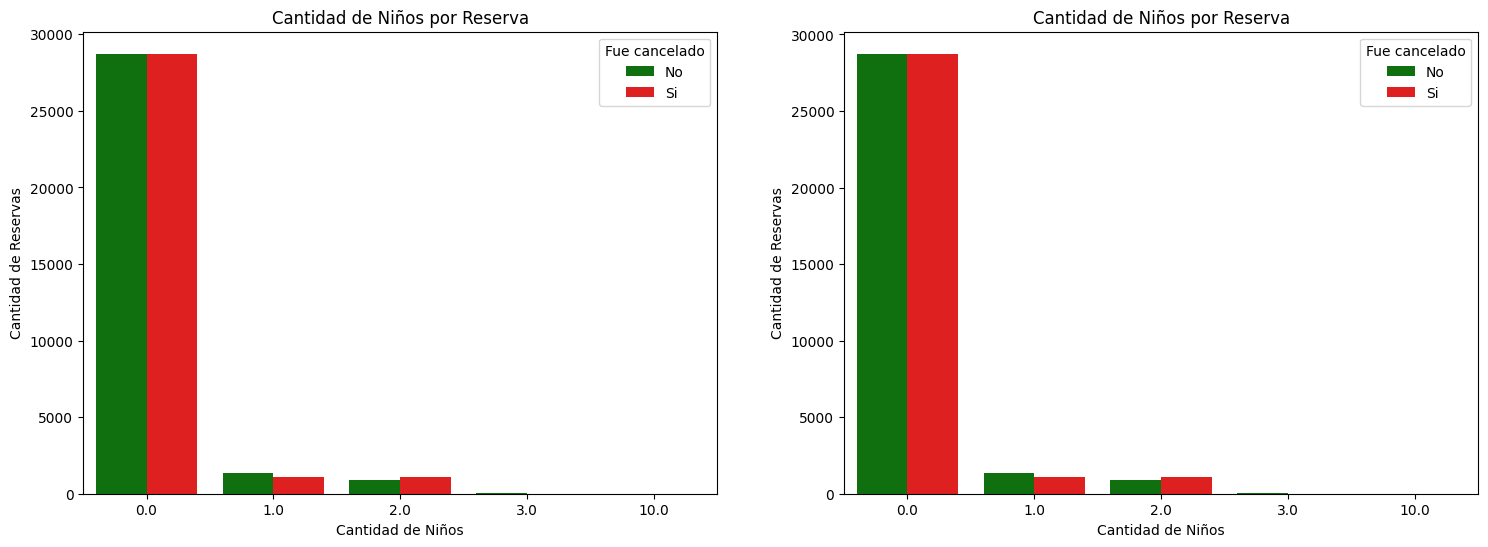

In [57]:
fig, axes = plt.subplots(1,2,figsize=(18, 6))

#Cantidad de Niños por Reserva
sns.countplot(data=DF_HOTEL, x="children", hue="is_canceled", palette=["green", "red"], ax=axes[0])
axes[0].set_title("Cantidad de Niños por Reserva")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].set_xlabel("Cantidad de Niños")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

#Cantidad de Niños por Reserva
sns.countplot(data=df_hotel_copy, x="children", hue="is_canceled", palette=["green", "red"], ax=axes[1])
axes[1].set_title("Cantidad de Niños por Reserva")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].set_xlabel("Cantidad de Niños")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])


Gráfico que muestra la comparativa del antes y el después de la imputación. Como la cantidad de datos nulos era insignificante no se observa una clara diferencia entre los mismos.

### Porcentaje de datos Faltantes en Agent

In [58]:
porcentaje_datos_faltantes_agent = (DF_HOTEL["agent"].isnull().sum() / len(DF_HOTEL)) * 100
porcentaje_datos_presentes_agent = 100 - porcentaje_datos_faltantes_agent

Text(0.5, 1.0, '% Datos Faltantes de Agent')

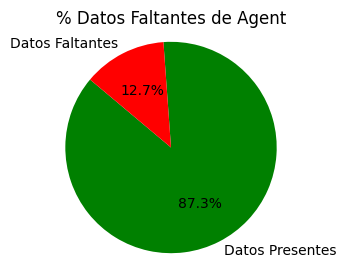

In [59]:
plt.figure(figsize=(3, 3))

plt.pie(
    x = [porcentaje_datos_presentes_agent, porcentaje_datos_faltantes_agent],
    labels = ["Datos Presentes", "Datos Faltantes"],
    colors = ["green", "red"],
    autopct = "%1.1f%%",
    startangle = 140,
)

plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("% Datos Faltantes de Agent")

Para la imputación se decidió poner un nuevo valor ("Agencia no existe") ya que no hay forma de obtener el verdadero valor de los datos faltantes y no se decidió utilizar moda por la gran cantidad de datos faltantes.

In [60]:
df_hotel_copy['agent'] = df_hotel_copy['agent'].fillna("Agencia no existe")

In [61]:
agencias_con_mas_reservas_alternativa = df_hotel_copy["agent"].value_counts().head(5).index
registros_agencias_con_mas_reservas_alternativa = df_hotel_copy[df_hotel_copy["agent"].isin(agencias_con_mas_reservas_alternativa)]


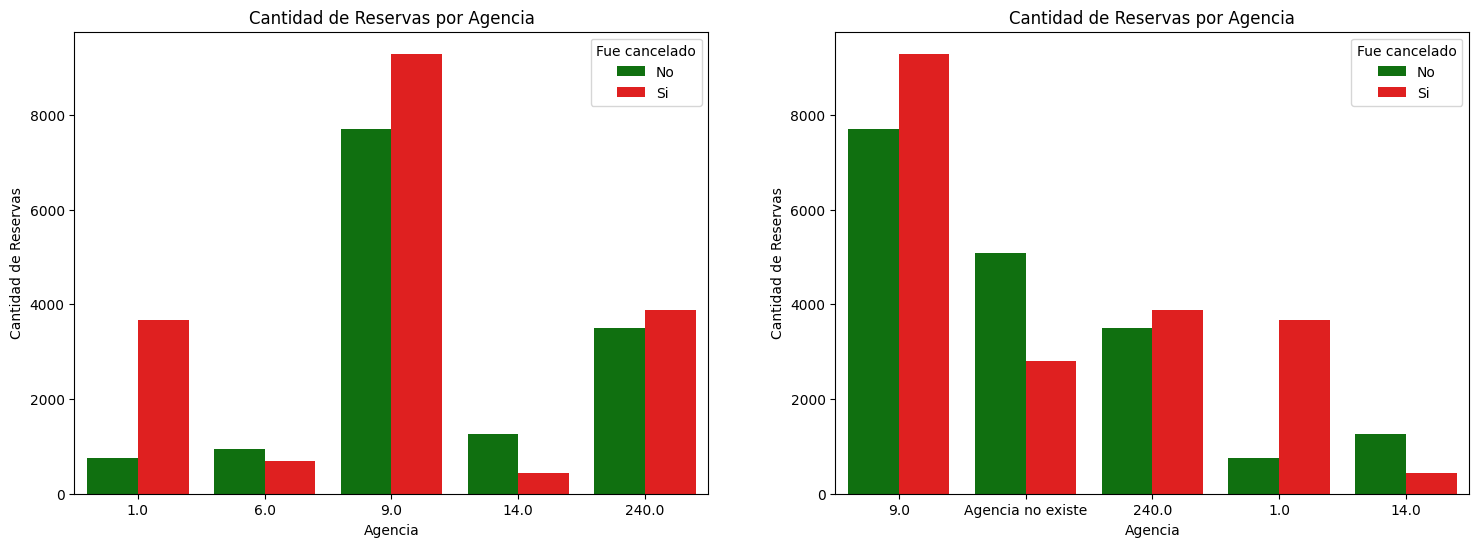

In [62]:
fig, axes = plt.subplots(1,2,figsize=(18, 6))

sns.countplot(
    data = registros_agencias_con_mas_reservas, #Variable obtenida a partir de DF_HOTEL en la sección de análisis gráfico
    x = "agent",
    hue = "is_canceled",
    palette = ["green", "red"],
    ax= axes[0]
)

axes[0].set_title("Cantidad de Reservas por Agencia")
axes[0].set_xlabel("Agencia")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

sns.countplot(
    data = registros_agencias_con_mas_reservas_alternativa,
    x = "agent",
    hue = "is_canceled",
    palette = ["green", "red"],
    ax = axes[1]
)

axes[1].set_title("Cantidad de Reservas por Agencia")
axes[1].set_xlabel("Agencia")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])


EL gráfico muestra la comparación del antes y después de la imputación.

### Porcentaje de datos Faltantes en Country

In [63]:
porcentaje_datos_faltantes_country = (DF_HOTEL["country"].isnull().sum() / len(DF_HOTEL)) * 100
porcentaje_datos_presentes_country = 100 - porcentaje_datos_faltantes_country

Text(0.5, 1.0, '% Datos Faltantes de Country')

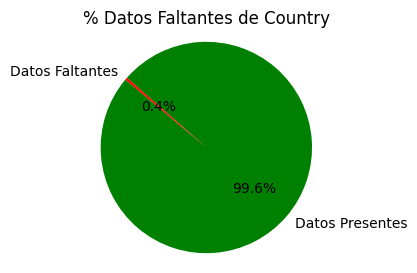

In [64]:
plt.figure(figsize=(3, 3))

plt.pie(
    x = [porcentaje_datos_presentes_country, porcentaje_datos_faltantes_country],
    labels = ["Datos Presentes", "Datos Faltantes"],
    colors = ["green", "red"],
    autopct = "%1.1f%%",
    startangle = 140,
)

plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("% Datos Faltantes de Country")

Se observó que al no ser un porcentaje tan grande de datos faltantes, se eligió por optar la moda, al ver que una variable (PRT) predominaba a las otras, este método es el que menos ruido generaría en los datos.

In [65]:
df_hotel_copy['country'] = df_hotel_copy['country'].fillna(df_hotel_copy['country'].mode()[0])

paises_con_mas_registros_alternativa = df_hotel_copy["country"].value_counts().head(10).index
registros_paises_con_mas_reservas_alternativa = df_hotel_copy[df_hotel_copy["country"].isin(paises_con_mas_registros_alternativa)]

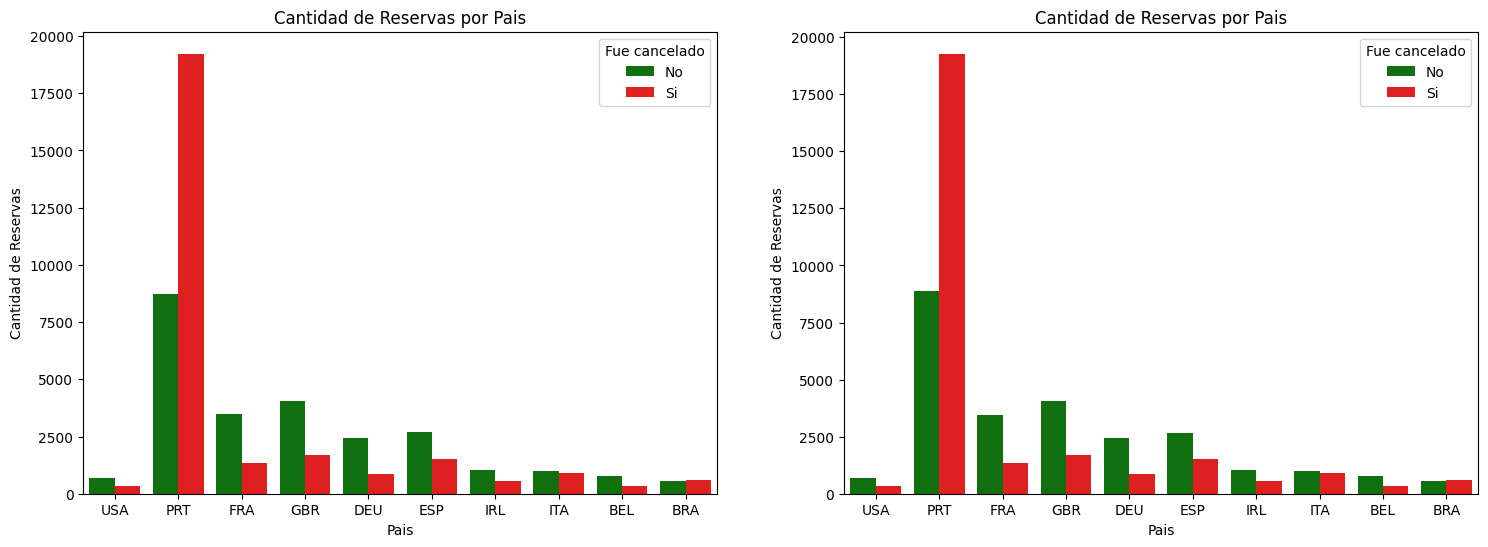

In [66]:
fig, axes = plt.subplots(1,2,figsize=(18, 6))

sns.countplot(
    data = registros_paises_con_mas_reservas, #Variable obtenida a partir de DF_HOTEL en la sección de análisis gráfico.
    x = "country",
    hue = "is_canceled",
    palette = ["green", "red"],
    ax = axes[0]
)

axes[0].set_title("Cantidad de Reservas por Pais")
axes[0].set_xlabel("Pais")
axes[0].set_ylabel("Cantidad de Reservas")
axes[0].legend(title="Fue cancelado", labels=["No", "Si"])

sns.countplot(
    data = registros_paises_con_mas_reservas_alternativa,
    x = "country",
    hue = "is_canceled",
    palette = ["green", "red"],
    ax = axes[1]
)

axes[1].set_title("Cantidad de Reservas por Pais")
axes[1].set_xlabel("Pais")
axes[1].set_ylabel("Cantidad de Reservas")
axes[1].legend(title="Fue cancelado", labels=["No", "Si"])

El gráfico muestra la comparación del antes y después de la imputación.

### Porcentaje de datos Faltantes en Company

In [67]:
porcentaje_datos_faltantes_company = (DF_HOTEL["company"].isnull().sum() / len(DF_HOTEL)) * 100
porcentaje_datos_presentes_company = 100 - porcentaje_datos_faltantes_company


Text(0.5, 1.0, '% Datos Faltantes de Compañías')

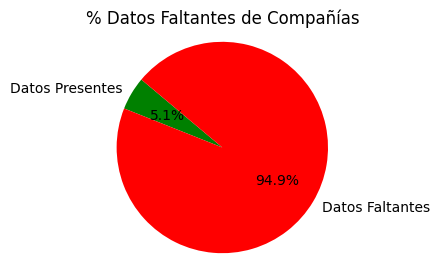

In [68]:
plt.figure(figsize=(3, 3))

plt.pie(
    x = [porcentaje_datos_presentes_company, porcentaje_datos_faltantes_company],
    labels = ["Datos Presentes", "Datos Faltantes"],
    colors = ["green", "red"],
    autopct = "%1.1f%%",
    startangle = 140,
)

plt.axis("equal")  # Asegura que el gráfico sea un círculo
plt.title("% Datos Faltantes de Compañías")


Cómo el porcentaje de datos faltantes es muy elevado se puede eliminar del dataset la variable

In [69]:
df_hotel_copy.drop(columns=["company"], inplace=True, axis=1)

#D) Valores atípicos

Se consideran solo las variables relevantes para realizar el analisis de los valores atípicos.

1. hotel
2. lead_time
3. adults
4. country
5. is_repeated_guest
6. previous_cancellations
7. previous_bookings_not_canceled
8. reserved_room_type
9. assigned_room_type
10. booking_changes
11. deposit_type
12. agent
13. days_in_waiting_list
14. total_of_special_request

## Análisis gráfico univariado de outliers

###Obervaciones previas

Se identificó un valor atípico en el caso de que un registro presentara cliente repetido (is_repeated_guest) y, al mismo tiempo, no tuviera cancelaciones previas (previous_cancellations) ni reservas previas que no hubieran sido canceladas (previous_bookings_not_canceled) .

Tipo de outlier: **Contextual**

In [70]:
#Eliminación de outlier por ínidce de fila
indice_outlier = df_hotel_copy[(df_hotel_copy["is_repeated_guest"]) & (df_hotel_copy["previous_cancellations"] == 0) & (df_hotel_copy["previous_bookings_not_canceled"] == 0)].index
df_hotel_copy.drop(indice_outlier, inplace=True)

La variable *ADR* presenta valores atípicos como ceros y negativos, por ende, se van a eliminar los registros con ese valor.

Tipo de outlier: **Contextual**

In [71]:
#Eliminación de outlier por ínidce de fila
indice_outlier = df_hotel_copy[(df_hotel_copy["adr"]) <= 0 ].index
df_hotel_copy.drop(indice_outlier, inplace=True)

###Diagrama de caja para la variable adults (Cantidad de adultos)

Text(0, 0.5, 'Cantidad de adultos')

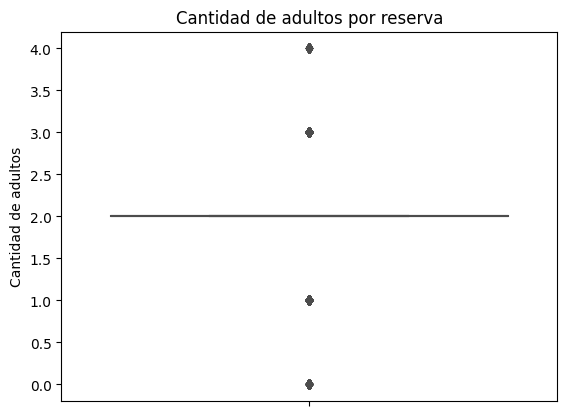

In [72]:
sns.boxplot(
    data = df_hotel_copy,
    y = df_hotel_copy.adults,
    palette = ["yellow"]
)

plt.title("Cantidad de adultos por reserva")
plt.ylabel("Cantidad de adultos")


In [73]:
#Eliminación de outlier por ínidce de fila
indice_outlier = df_hotel_copy[df_hotel_copy['adults'] == 0].index
df_hotel_copy.drop(indice_outlier, inplace=True)

Se clasificaron como valores atípicos aquellos que eran inferiores a cero o negativos y se decidió eliminarlos. Para identificar valores atípicos superiores, se realizó un análisis multivariado.

Tipo de outlier: **Contextual**

A continuación se realiza el gráfico luego de haber eliminado los outliers.

Text(0, 0.5, 'Cantidad de adultos')

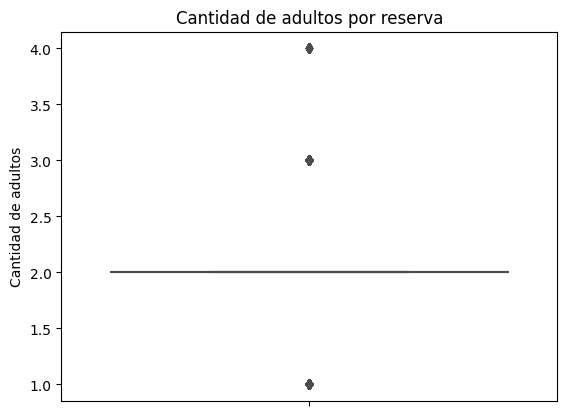

In [74]:
sns.boxplot(
    data = df_hotel_copy,
    y = df_hotel_copy.adults,
    palette = ["yellow"]
)

plt.title("Cantidad de adultos por reserva")
plt.ylabel("Cantidad de adultos")

###Diagrama de caja para la variable lead_time (Tiempo de arribo)

Text(0, 0.5, 'Tiempo de arribo (Días)')

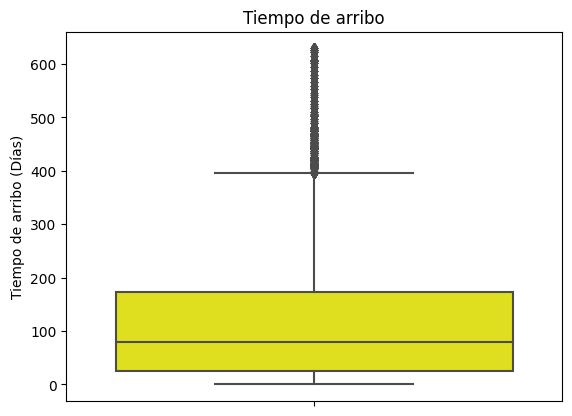

In [75]:
sns.boxplot(
    data = df_hotel_copy,
    y="lead_time",
    palette=["yellow"]
)

plt.title("Tiempo de arribo")
plt.ylabel("Tiempo de arribo (Días)")


A continuación se identificarán los outliers con el criterio del rango intercuartil (IQR).

In [76]:
#Cuartiles
Q1 = np.quantile(df_hotel_copy["lead_time"], 0.25)
Q3 = np.quantile(df_hotel_copy["lead_time"], 0.75)

#Rango intercuartil
IQR = Q3 - Q1
limite_outlier_superior = Q3 + 1.5 * IQR
limite_outlier_inferior = Q1 - 1.5 * IQR
moderado = Q3 + 1.5 * IQR
severo = Q1 + 3 * IQR

print("Limite inferior outliers:", limite_outlier_inferior)
print("Limite superior outliers:", limite_outlier_superior)
print("Moderados: ", (df_hotel_copy["lead_time"] > moderado).sum())
print("Severos: ", (df_hotel_copy["lead_time"] > severo).sum())

Limite inferior outliers: -197.0
Limite superior outliers: 395.0
Moderados:  1360
Severos:  430


In [77]:
indice_outlier = df_hotel_copy[df_hotel_copy["lead_time"] > severo].index
df_hotel_copy.drop(indice_outlier, inplace=True)

Los valores que exceden los límites calculados mediante el método del Rango Intercuartil (IQR) se consideran valores atípicos. En este contexto, se han identificado 1368 casos como moderados y 433 casos como severos; y  se decidió eliminar los que son severos.

Tipo de outlier: **Colectivo**

A continuación se realiza el gráfico luego de haber eliminado los outliers.

Text(0, 0.5, 'Tiempo de arribo (Días)')

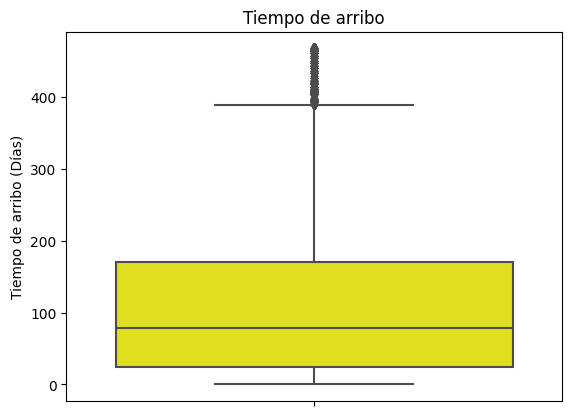

In [78]:
sns.boxplot(
    data = df_hotel_copy,
    y="lead_time",
    palette=["yellow"]
)

plt.title("Tiempo de arribo")
plt.ylabel("Tiempo de arribo (Días)")

###Diagrama de caja para la variable previous_cancellations (Cancelaciones previas)

Text(0, 0.5, 'Cantidad de cancelaciones previas')

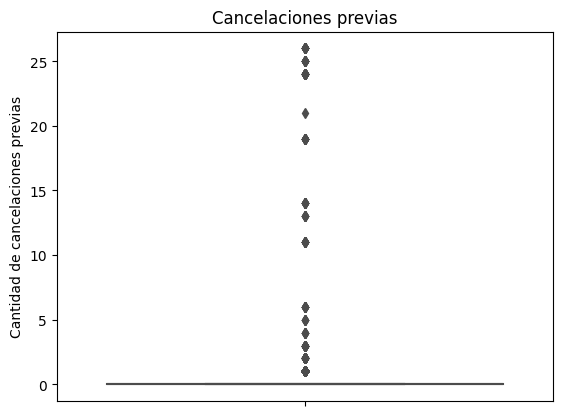

In [79]:
sns.boxplot(
    data = df_hotel_copy,
    y = "previous_cancellations",
    palette=["yellow"]
)

plt.title("Cancelaciones previas")
plt.ylabel("Cantidad de cancelaciones previas")


In [80]:
#z-score modificado previous_cancellations
mediana_previous_cancellations = np.median(df_hotel_copy.previous_cancellations)
MAD = np.median(np.absolute(df_hotel_copy.previous_cancellations-mediana_previous_cancellations))

df_hotel_copy['zm_previous_cancellations'] = (df_hotel_copy.previous_cancellations - mediana_previous_cancellations) * 0.6745 / MAD

print(df_hotel_copy['zm_previous_cancellations'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
61908   NaN
61909   NaN
61910   NaN
61911   NaN
61912   NaN
Name: zm_previous_cancellations, Length: 60327, dtype: float64


In [81]:
#Cuartiles
Q1 = np.quantile(df_hotel_copy.previous_cancellations,0.25)
Q3 = np.quantile(df_hotel_copy.previous_cancellations,0.75)

#Rango intercuartil
IQR = Q3 - Q1
limite_outlier_superior = Q3 + 1.5 * IQR
limite_outlier_inferior = Q1 - 1.5 * IQR
moderado = Q3 + 1.5 * IQR
severo = Q1 + 3 * IQR

print("Limite inferior outliers:", limite_outlier_inferior)
print("Limite superior outliers:", limite_outlier_superior)
print("Moderados: ", (df_hotel_copy.previous_cancellations > moderado).sum())
print("Severos: ", (df_hotel_copy.previous_cancellations > severo).sum())

Limite inferior outliers: 0.0
Limite superior outliers: 0.0
Moderados:  4342
Severos:  4342


In [82]:
#z-score
filtrado = filter(lambda x: -3 > x or x > 3, zscore(df_hotel_copy.previous_cancellations))
print(len(list(filtrado)))

150


In [83]:
df_hotel_copy.drop(columns=["zm_previous_cancellations"], axis=1, inplace=True)

Se realizó un análisis con los métodos Z-Score, Z-Score Modificado e IQR, y se decidió quedarse con  el resultado del Z-Score, ya que, al haber una gran cantidad de datos con valor cero estaría afectando en los calculos de los otros dos métodos, sin embargo, se decidió no eliminarlos ya que no afecta al contexto del análisis.

Tipo de outlier: **Contextual**

###Diagrama de caja para la variable previous_bookings_not_canceled (reservas previas no canceladas)

Text(0, 0.5, 'Cantidad de reservas no canceladas')

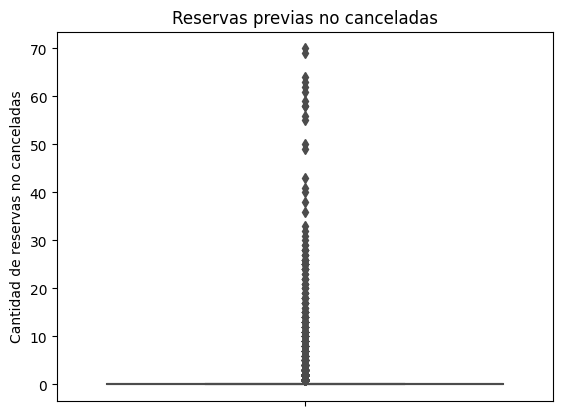

In [84]:
sns.boxplot(
    data = df_hotel_copy,
    y = "previous_bookings_not_canceled",
    palette=['yellow']
)

plt.title("Reservas previas no canceladas")
plt.ylabel("Cantidad de reservas no canceladas")


In [85]:
#z-score modificado previous_bookings_not_canceled
mediana_previous_bookings_not_canceled = np.median(df_hotel_copy.previous_bookings_not_canceled)
MAD = np.median(np.absolute(df_hotel_copy.previous_bookings_not_canceled - mediana_previous_bookings_not_canceled))

df_hotel_copy["zm_previous_bookings_not_canceled"] = (df_hotel_copy.previous_bookings_not_canceled - mediana_previous_bookings_not_canceled)*0.6745/MAD

print(df_hotel_copy["zm_previous_bookings_not_canceled"])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
61908   NaN
61909   NaN
61910   NaN
61911   NaN
61912   NaN
Name: zm_previous_bookings_not_canceled, Length: 60327, dtype: float64


In [86]:
#Cuartiles
Q1 = np.quantile(df_hotel_copy.previous_bookings_not_canceled, 0.25)
Q3 = np.quantile(df_hotel_copy.previous_bookings_not_canceled, 0.75)

#Rango intercuartil
IQR = Q3 - Q1
limite_outlier_superior = Q3 + 1.5 * IQR
limite_outlier_inferior = Q1 - 1.5 * IQR
moderado = Q3 + 1.5 * IQR
severo = Q1 + 3 * IQR

print("Limite inferior outliers:", limite_outlier_inferior)
print("Limite superior outliers:", limite_outlier_superior)
print("Moderados: ", (df_hotel_copy.previous_bookings_not_canceled > moderado).sum())
print("Severos: ", (df_hotel_copy.previous_bookings_not_canceled > severo).sum())

Limite inferior outliers: 0.0
Limite superior outliers: 0.0
Moderados:  1403
Severos:  1403


In [87]:
#z-score
filtrado = filter(lambda x: -3 > x or x > 3, zscore(df_hotel_copy.previous_bookings_not_canceled))
print(len(list(filtrado)))

349


In [88]:
df_hotel_copy.drop(columns=["zm_previous_bookings_not_canceled"], axis=1, inplace=True)

Al igual que con la variable anterior se realizo el mismo análisis y se llego a la misma conclusión.

Tipo de outlier: **Contextual**

###Diagrama de caja para la variable booking_changes (cambios en la reserva)

Text(0, 0.5, 'Cantidad de cambios')

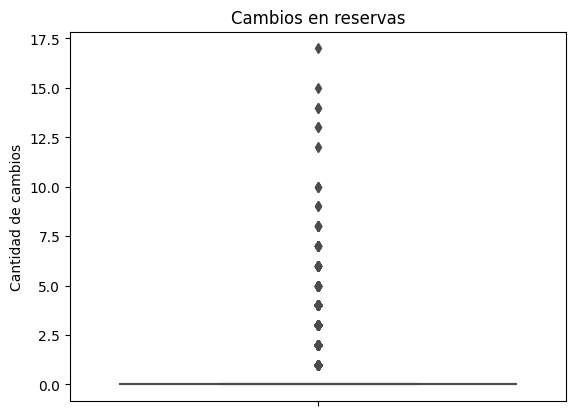

In [89]:
sns.boxplot(
    data = df_hotel_copy,
    y = "booking_changes",
    palette = ['yellow']
)

plt.title("Cambios en reservas")
plt.ylabel("Cantidad de cambios")


In [90]:
#z-score modificado booking_changes
mediana_booking_changes = np.median(df_hotel_copy.booking_changes)
MAD = np.median(np.absolute(df_hotel_copy.booking_changes - mediana_booking_changes))

df_hotel_copy["zm_booking_changes"] = (df_hotel_copy.booking_changes - mediana_booking_changes) * 0.6745 / MAD

print(df_hotel_copy["zm_booking_changes"])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
61908    NaN
61909    NaN
61910    NaN
61911    NaN
61912    inf
Name: zm_booking_changes, Length: 60327, dtype: float64


In [91]:
#Cuartiles
Q1 = np.quantile(df_hotel_copy.booking_changes,0.25)
Q3 = np.quantile(df_hotel_copy.booking_changes,0.75)

#Rango intercuartil
IQR = Q3 - Q1
limite_outlier_superior = Q3 + 1.5 * IQR
limite_outlier_inferior = Q1 - 1.5 * IQR
moderado = Q3 + 1.5 * IQR
severo = Q1 + 3 * IQR

print("Limite inferior outliers:", limite_outlier_inferior)
print("Limite superior outliers:", limite_outlier_superior)
print("Moderados: ", (df_hotel_copy.booking_changes > moderado).sum())
print("Severos: ", (df_hotel_copy.booking_changes > severo).sum())

Limite inferior outliers: 0.0
Limite superior outliers: 0.0
Moderados:  8019
Severos:  8019


In [92]:
#z-score
filtrado = filter(lambda x: -3 > x or x > 3, zscore(df_hotel_copy.booking_changes))
print(len(list(filtrado)))

2404


In [93]:
df_hotel_copy.drop(columns=["zm_booking_changes"], axis=1, inplace=True)

Al igual que con la variable anterior se realizo el mismo análisis y se llego a la misma conclusión.

Tipo de outlier: **Contextual**

###Diagrama de caja para la variable days_in_waiting_list (Días en lista de espera)

Text(0, 0.5, 'Cantidad de dias en lista de espera')

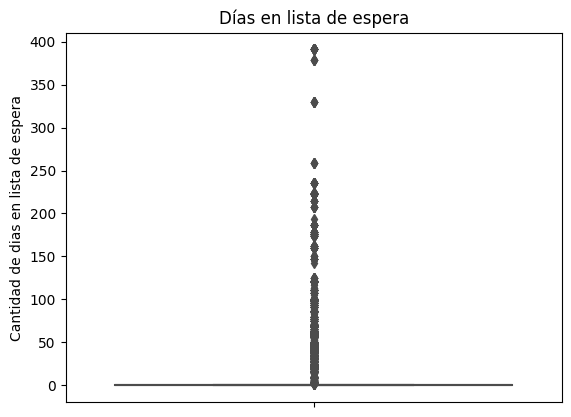

In [94]:
sns.boxplot(
    data = df_hotel_copy,
    y="days_in_waiting_list",
    palette=["yellow"]
)

plt.title("Días en lista de espera")
plt.ylabel("Cantidad de dias en lista de espera")


In [95]:
DF_HOTEL[DF_HOTEL["days_in_waiting_list"] >= 250].shape[0] #Cantidad de registros

50

In [96]:
indice_outlier = df_hotel_copy[df_hotel_copy["days_in_waiting_list"] >= 250].index
df_hotel_copy.drop(indice_outlier, inplace=True)

Se observa, que a partir de 250 días de espera, hay datos dispersos dando a entender que podrían ser outliers y al hacer un análisis se ve que es una cantidad reducida de registros entonces se decidió eliminarlos.

Tipo de outlier: **Contextual**

A continuación se realiza el gráfico luego de haber eliminado los outliers.

Text(0, 0.5, 'Cantidad de dias en lista de espera')

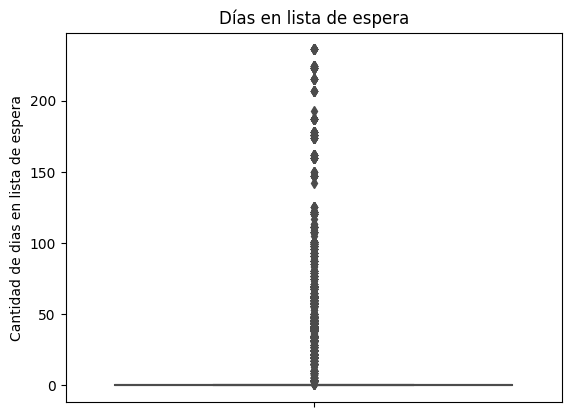

In [97]:
sns.boxplot(
    data = df_hotel_copy,
    y = "days_in_waiting_list",
    palette = ["yellow"]
)

plt.title("Días en lista de espera")
plt.ylabel("Cantidad de dias en lista de espera")

###Diagrama de caja para la variable total_of_special_requests (Pedidos especiales totales)

Text(0, 0.5, 'Cantidad de pedidos especiales')

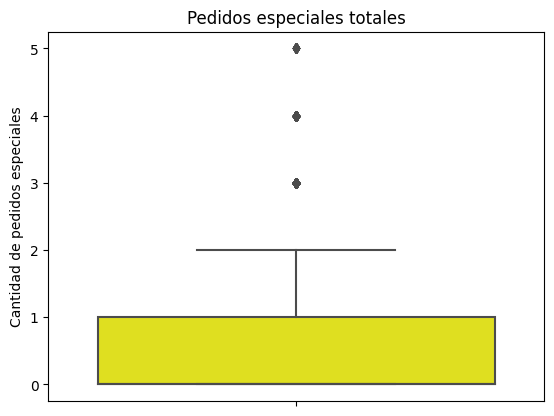

In [98]:
sns.boxplot(
    data = df_hotel_copy,
    y = "total_of_special_requests",
    palette = ['yellow']
)

plt.title("Pedidos especiales totales")
plt.ylabel("Cantidad de pedidos especiales")


A continuación se identificarán los outliers con el criterio del rango intercuartil (IQR).

In [99]:
#Cuartiles
Q1 = np.quantile(df_hotel_copy.total_of_special_requests, 0.25)
Q3 = np.quantile(df_hotel_copy.total_of_special_requests, 0.75)

#Rango intercuartil
IQR = Q3 - Q1
limite_outlier_superior = Q3 + 1.5 * IQR
limite_outlier_inferior = Q1 - 1.5 * IQR
moderado = Q3 + 1.5 * IQR
severo = Q1 + 3 * IQR

print("Limite inferior outliers:", limite_outlier_inferior)
print("Limite superior outliers:", limite_outlier_superior)
print("Moderados: ", (df_hotel_copy.total_of_special_requests > moderado).sum())
print("Severos: ", (df_hotel_copy.total_of_special_requests > severo).sum())

Limite inferior outliers: -1.5
Limite superior outliers: 2.5
Moderados:  1312
Severos:  163


Se observa en el calculo que los que estan por encima de 2.5 son outliers severos, sin embargo, se considero que en este contexto no serian outliers.

Tipo de outlier: **Global**

## Análisis gráfico multivariado de outliers

Lista para analisis:
- previous_bookings_not_canceled
- booking_change
- days_in_waiting_list


Se analizó si habia días cero o negativos en la nueva variable creada (dias_totales) a partir de la suma de las variables "stay_in_week_nights" y "stay_in_weekend_nights" pero no se encontraron tales valores, por ende, no fue necesaria una modificación del dataframe.

### Cantidad de personas vs habitación asignada

Se realizará un análisis de la cantidad total de personas en la reserva y el tipo de habitación asignada con el propósito de detectar valores atípicos que se caractericen por la presencia de muchos registros de un tipo de habitación con un bajo número de personas y, al mismo tiempo, un registro con un gran número de personas para el mismo tipo de habitación.

In [100]:
df_hotel_copy["cantidad_personas_total"] = df_hotel_copy["adults"] + df_hotel_copy["children"] + df_hotel_copy["babies"]

Text(0, 0.5, 'Habitación asignada')

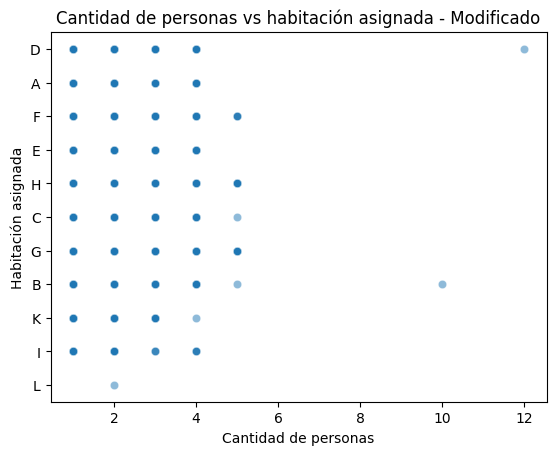

In [101]:
sns.scatterplot(
    data = df_hotel_copy,
    x = "cantidad_personas_total",
    y = "assigned_room_type",
    alpha = 0.5
)

plt.title("Cantidad de personas vs habitación asignada - Modificado")
plt.xlabel("Cantidad de personas")
plt.ylabel("Habitación asignada")

In [102]:
#Eliminación de outlier por ínidce de fila
indice_outlier = df_hotel_copy[df_hotel_copy["cantidad_personas_total"] >= 10].index
df_hotel_copy.drop(indice_outlier, inplace=True)

Se observa en el gráfico que por lo general en las habitaciones se asignan para
menos de diez personas, por ende, las habitaciones que fueron asignadas para una cantidad mayor o igual se la considerara outlier y se decidió eliminar dichos registros.

Tipo de outlier: **Global**

A continuación se realiza el gráfico luego de haber eliminado los outliers.

Text(0, 0.5, 'Habitación asignada')

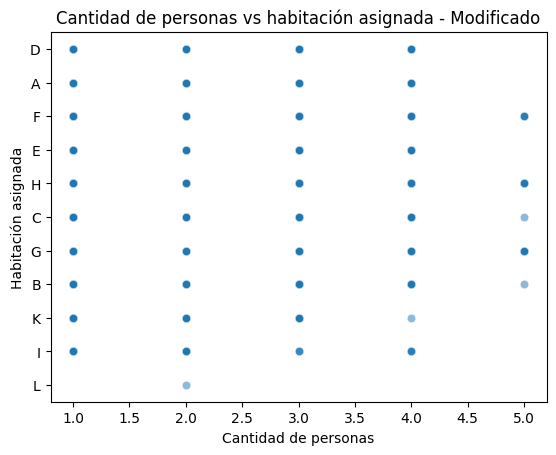

In [103]:
sns.scatterplot(
    data = df_hotel_copy,
    x = "cantidad_personas_total",
    y = "assigned_room_type",
    alpha = 0.5
)

plt.title("Cantidad de personas vs habitación asignada - Modificado")
plt.xlabel("Cantidad de personas")
plt.ylabel("Habitación asignada")

# Exportar DataFrame Filtrado

In [104]:
df_hotel_copy.to_csv("hotel_train_procesado.csv", index=False)